In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:


# Load the data
file_path = '/content/drive/MyDrive/Crowd data for anomaly detection.csv'
data = pd.read_csv(file_path)



In [3]:
data.shape

(24123, 12)

In [4]:
data.columns

Index(['timestamp', 'X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density',
       'Acc', 'LevelOfCrowdness', 'label', 'label2', 'Severity_level'],
      dtype='object')

In [5]:
data.head()

timestamp       X        Y   Speed  Heading  AgentCount  Density     Acc  \
0   0:05:36  0.4225  19.1176  1.1432  89.1222          81     0.81 -0.0027   
1   0:05:37  0.3704  19.5130  1.1476  89.5976          83     0.83 -0.0027   
2   0:05:38  0.3999  19.8316  1.1466  89.4905          86     0.86 -0.0051   
3   0:05:39  0.3787  20.0386  1.1521  89.2123          88     0.88 -0.0009   
4   0:05:40  0.4031  20.4625  1.1499  89.2521          88     0.88 -0.0012   

   LevelOfCrowdness  label  label2  Severity_level  
0                 1      0  normal               0  
1                 1      0  normal               0  
2                 1      0  normal               0  
3                 1      0  normal               0  
4                 1      0  normal               0

### **HANDLING MISSING VALUES**

In [6]:


# Check for missing values
missing_values = data.isnull().sum()

# Check data types
data_types = data.dtypes

# Print the missing values, and data types

print("\nMissing Values:\n", missing_values)
print("\nData Types:\n", data_types)





Missing Values:
 timestamp             0
X                     0
Y                     0
Speed                 0
Heading               0
AgentCount            0
Density               0
Acc                 104
LevelOfCrowdness      0
label                 0
label2                0
Severity_level        0
dtype: int64

Data Types:
 timestamp            object
X                   float64
Y                   float64
Speed               float64
Heading             float64
AgentCount            int64
Density             float64
Acc                 float64
LevelOfCrowdness      int64
label                 int64
label2               object
Severity_level        int64
dtype: object


In [7]:
#descriptive statistics
descriptive_stats = data.describe(include='all')
print("Descriptive Statistics:\n", descriptive_stats)

Descriptive Statistics:
        timestamp             X             Y         Speed       Heading  \
count      24123  24123.000000  24123.000000  24123.000000  24123.000000   
unique      3587           NaN           NaN           NaN           NaN   
top      0:59:49           NaN           NaN           NaN           NaN   
freq           8           NaN           NaN           NaN           NaN   
mean         NaN      0.319789     19.989362      0.742941     90.314782   
std          NaN      0.067545      1.205473      0.279331      4.803848   
min          NaN     -1.205900     11.162700      0.124400     84.324100   
25%          NaN      0.264500     19.575700      0.496700     88.475950   
50%          NaN      0.325400     20.288600      0.784300     89.170200   
75%          NaN      0.356800     20.692900      1.005900     89.798100   
max          NaN      1.966700     23.771700      1.567800    138.162100   

          AgentCount       Density           Acc  LevelOfCrowd

In [8]:
# Handle missing values by filling with mean
data['Acc'].fillna(data['Acc'].mean(), inplace=True)

In [10]:
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%H:%M:%S')

In [12]:

#Remove duplicates
data.drop_duplicates(inplace=True)

In [13]:

# Verify the data after cleaning
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24123 entries, 0 to 24122
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         24123 non-null  datetime64[ns]
 1   X                 24123 non-null  float64       
 2   Y                 24123 non-null  float64       
 3   Speed             24123 non-null  float64       
 4   Heading           24123 non-null  float64       
 5   AgentCount        24123 non-null  int64         
 6   Density           24123 non-null  float64       
 7   Acc               24123 non-null  float64       
 8   LevelOfCrowdness  24123 non-null  int64         
 9   label             24123 non-null  int64         
 10  label2            24123 non-null  object        
 11  Severity_level    24123 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(4), object(1)
memory usage: 2.2+ MB
None


In [14]:
data.head(5)

timestamp       X        Y   Speed  Heading  AgentCount  Density  \
0 1900-01-01 00:05:36  0.4225  19.1176  1.1432  89.1222          81     0.81   
1 1900-01-01 00:05:37  0.3704  19.5130  1.1476  89.5976          83     0.83   
2 1900-01-01 00:05:38  0.3999  19.8316  1.1466  89.4905          86     0.86   
3 1900-01-01 00:05:39  0.3787  20.0386  1.1521  89.2123          88     0.88   
4 1900-01-01 00:05:40  0.4031  20.4625  1.1499  89.2521          88     0.88   

      Acc  LevelOfCrowdness  label  label2  Severity_level  
0 -0.0027                 1      0  normal               0  
1 -0.0027                 1      0  normal               0  
2 -0.0051                 1      0  normal               0  
3 -0.0009                 1      0  normal               0  
4 -0.0012                 1      0  normal               0

**Standardizing the data**

In [15]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Ensure all data is numeric and handle non-numeric columns if any
# Convert data to numeric and handle non-numeric columns by dropping or encoding
data_numeric = data.select_dtypes(include=[float, int])  # Select only numeric columns

# Standardize the data
standardized_data = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)

# Display the first few rows of the standardized dataset
print(standardized_data.head())

          X         Y     Speed   Heading  AgentCount   Density       Acc  \
0  1.520675 -0.723185  1.432952 -0.248261   -1.014795 -1.014795 -0.212691   
1  0.749318 -0.395174  1.448705 -0.149296   -1.002863 -1.002863 -0.212691   
2  1.186075 -0.130874  1.445125 -0.171591   -0.984965 -0.984965 -0.286634   
3  0.872202  0.040846  1.464815 -0.229505   -0.973032 -0.973032 -0.157233   
4  1.233452  0.392500  1.456939 -0.221219   -0.973032 -0.973032 -0.166476   

   LevelOfCrowdness     label  Severity_level  
0         -0.918124 -0.637515       -0.594115  
1         -0.918124 -0.637515       -0.594115  
2         -0.918124 -0.637515       -0.594115  
3         -0.918124 -0.637515       -0.594115  
4         -0.918124 -0.637515       -0.594115  


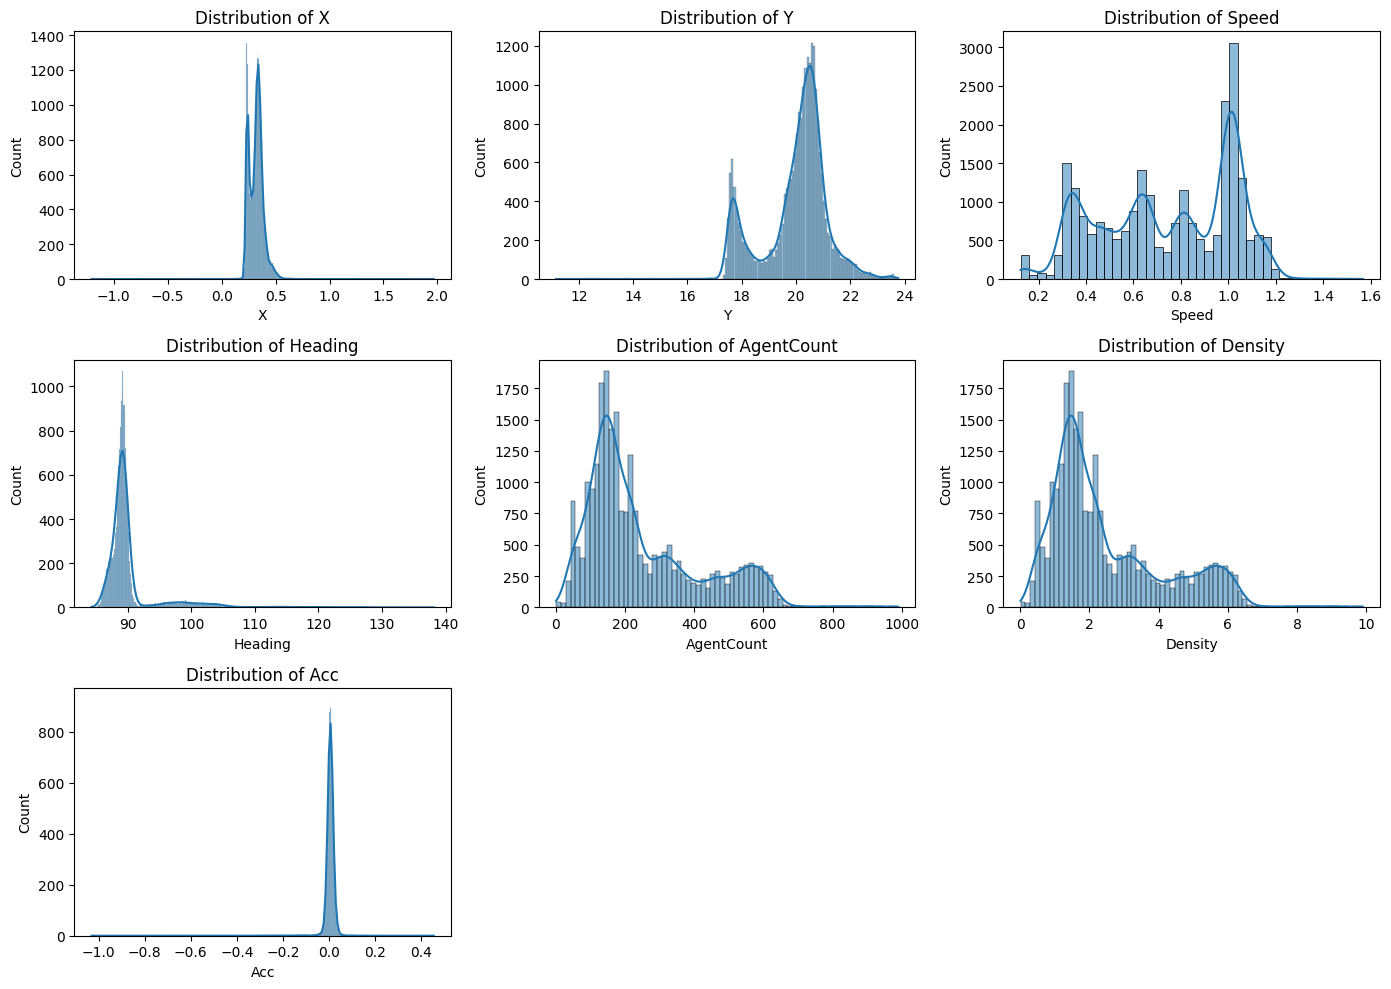

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of numeric features
numeric_features = ['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


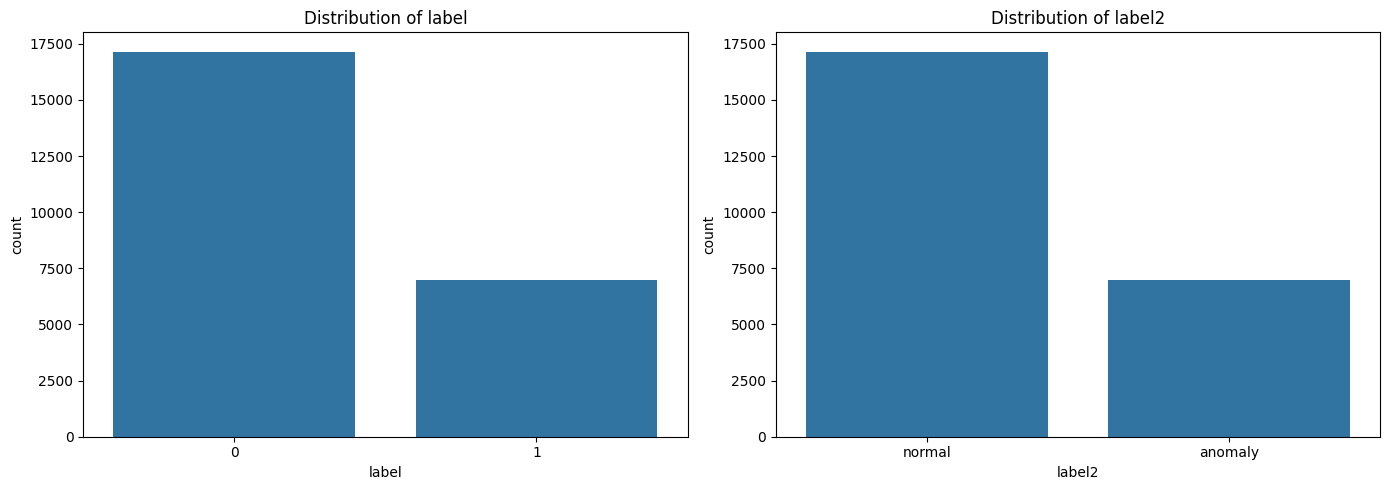

In [20]:
# Distribution of categorical features
categorical_features = ['label', 'label2']

plt.figure(figsize=(14, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


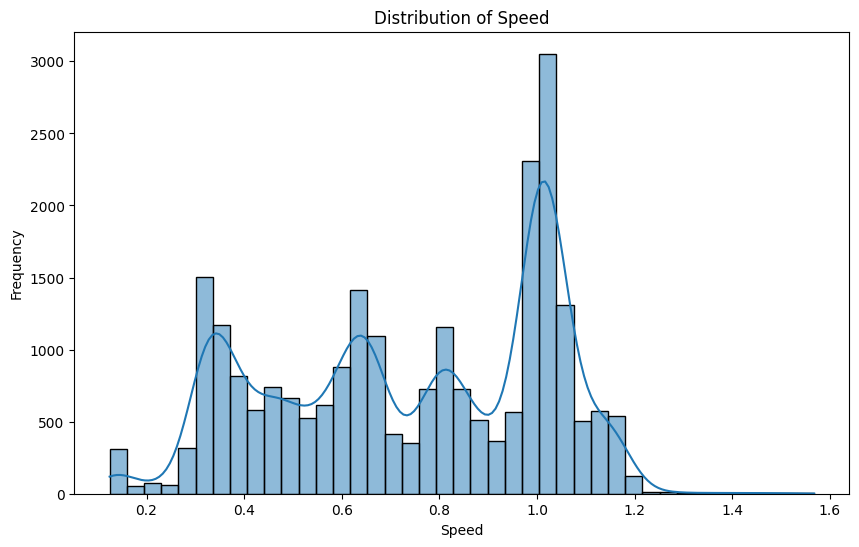

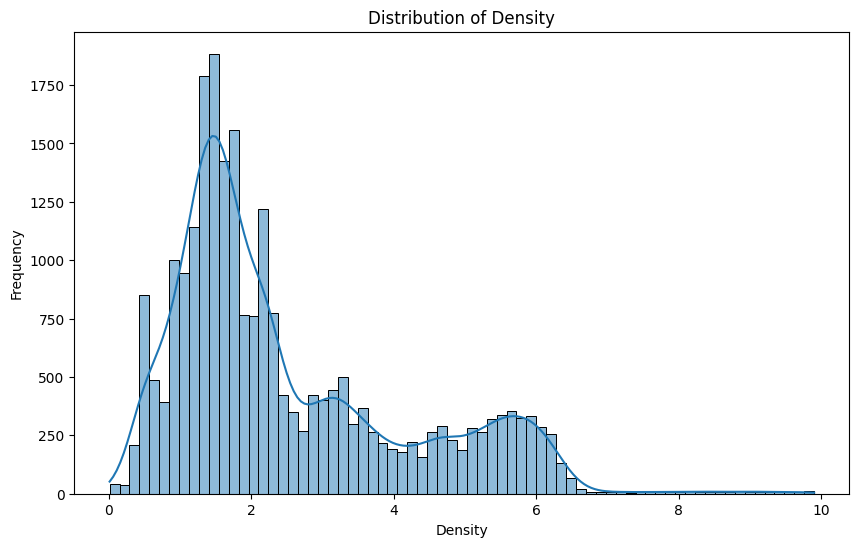

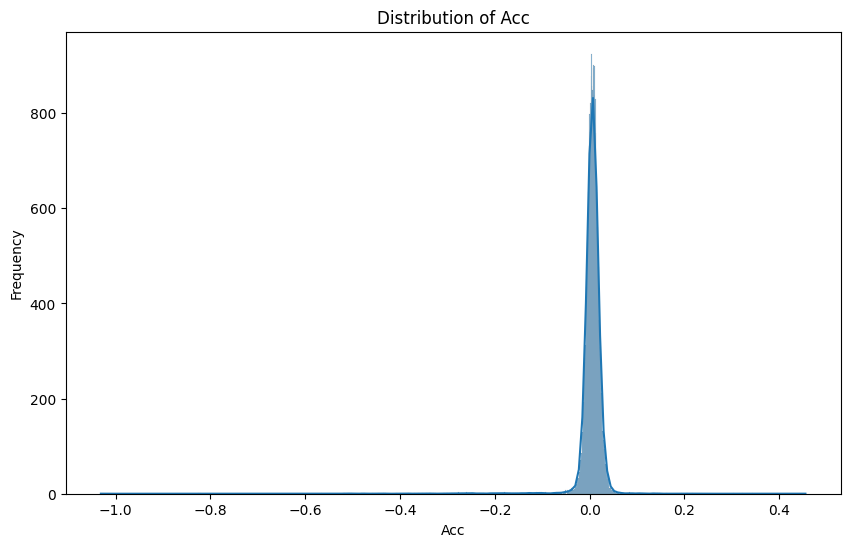

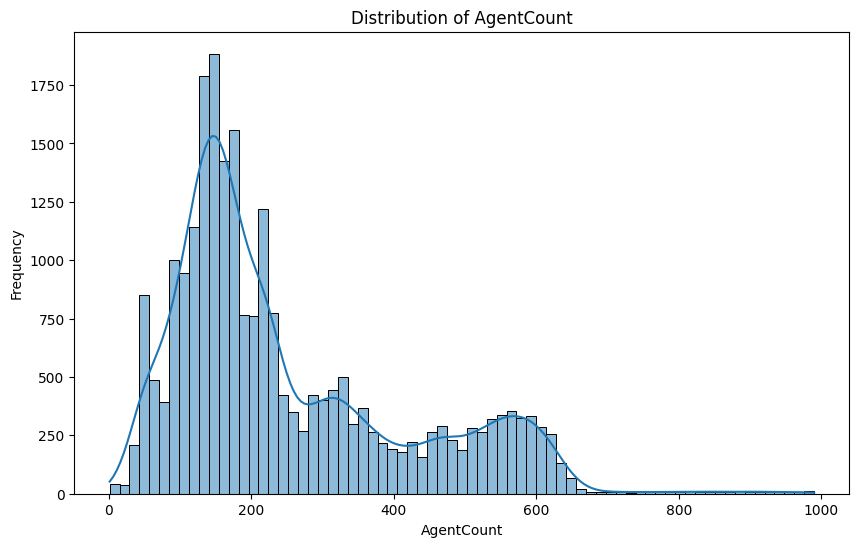

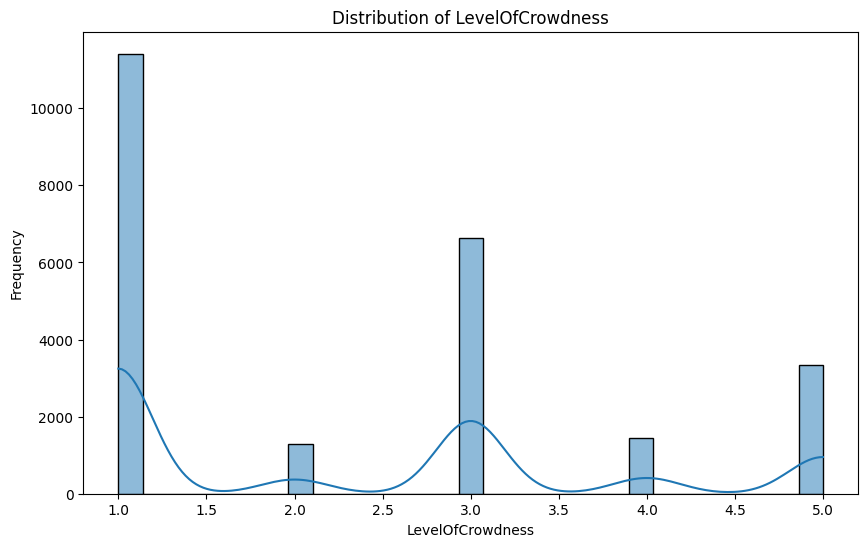

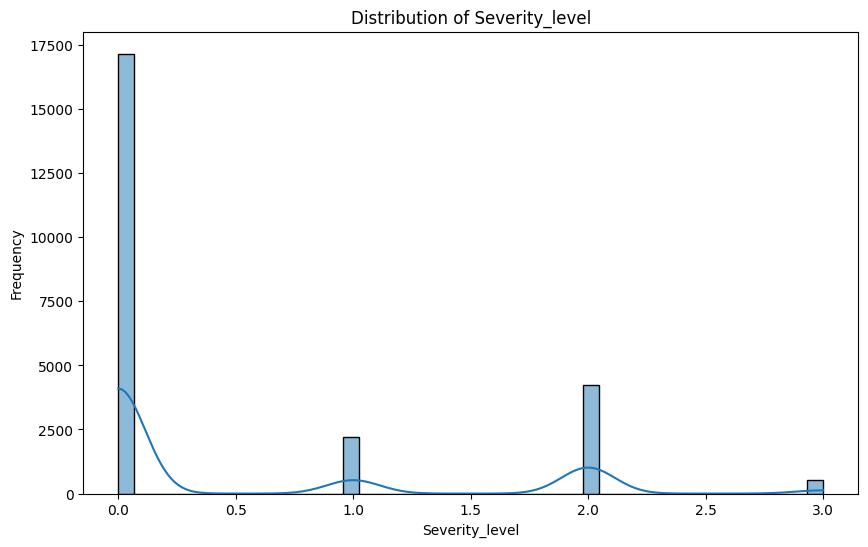

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

#  histogram for numerical features
numerical_features = ['Speed', 'Density', 'Acc', 'AgentCount', 'LevelOfCrowdness', 'Severity_level']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

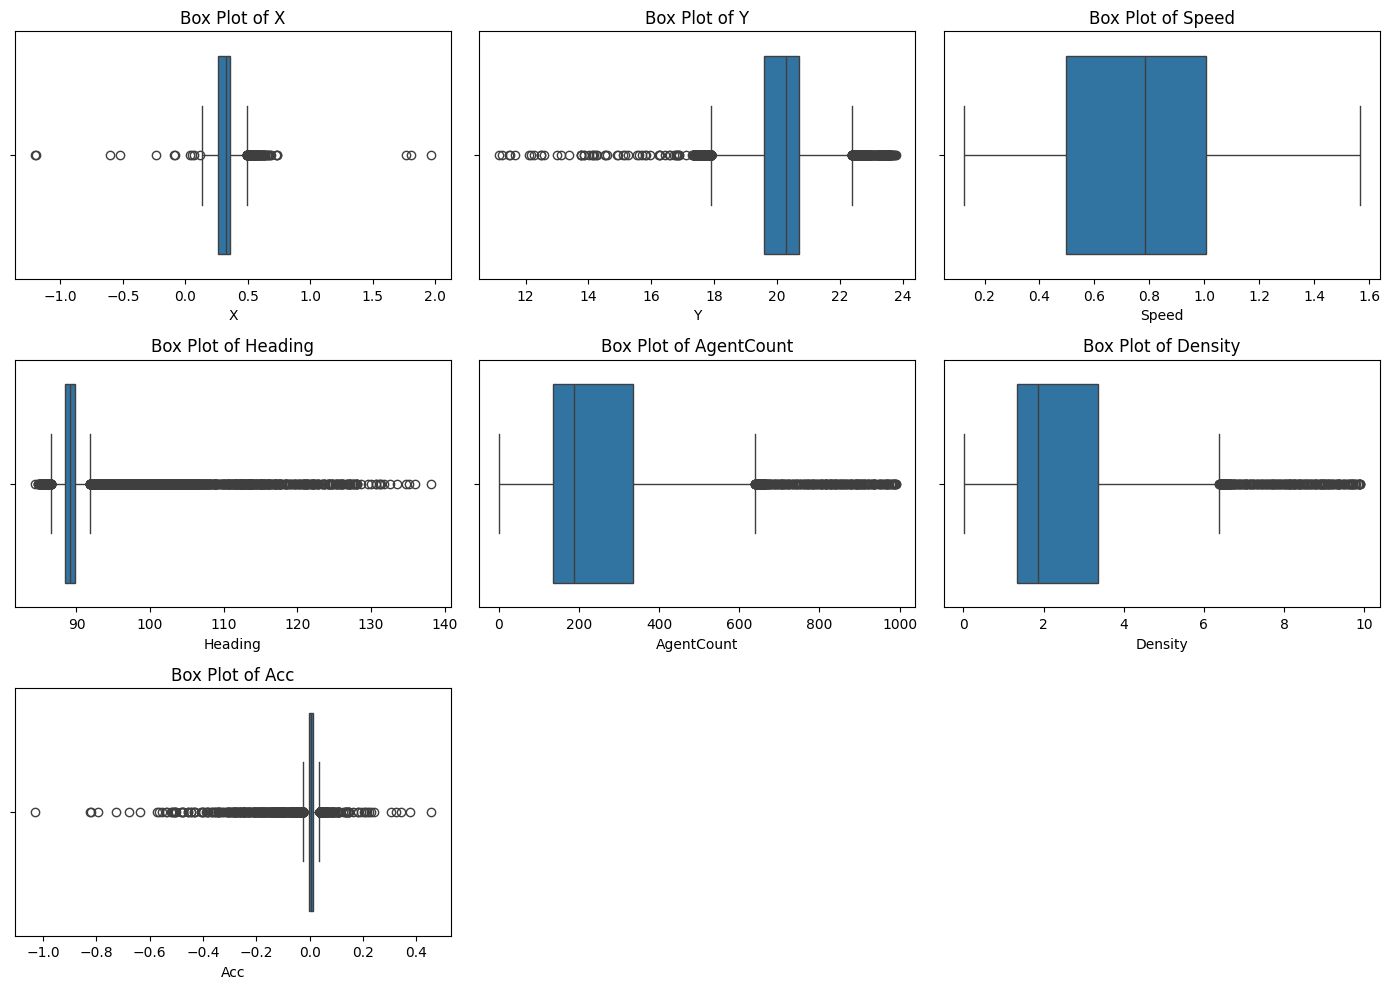

In [22]:
# Box plots for outlier detection
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


In [23]:
def detect_outliers(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    upper = np.where(data[column] > upper_bound)
    lower = np.where(data[column] < lower_bound)
    print(f'Outliers in {column}:')
    print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    print(f'Upper outliers: {upper}')
    print(f'Lower outliers: {lower}')

cols = [ 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc'] # Define cols outside the function
for col in cols:
    detect_outliers(data, col)



Outliers in Speed:
Lower bound: -0.26710000000000017, Upper bound: 1.7697000000000003
Upper outliers: (array([], dtype=int64),)
Lower outliers: (array([], dtype=int64),)
Outliers in Heading:
Lower bound: 86.49272500000002, Upper bound: 91.781325
Upper outliers: (array([ 1279,  2680,  2681, ..., 22425, 22426, 22427]),)
Lower outliers: (array([ 1421,  1422,  1503,  1505,  1538,  1541,  1629,  1647,  1661,
        1662,  1663,  1701,  1702,  1722,  1745,  1748,  1753,  1788,
        1791,  1792,  1795,  1796,  1799,  1806,  1807,  1842,  1852,
        1853,  1862,  1886,  1887,  1888,  1895,  1896,  1897,  1901,
        1916,  1955,  1978,  1979,  1987,  1988,  1989,  1990,  2024,
        2028,  2032,  2036,  2037,  2038,  2040,  2041,  2042,  2045,
        2050,  2051,  2053,  2056,  2087,  2112,  2156,  2170,  2171,
        2173,  2174,  2175,  2176,  2177,  2182,  2201, 10961, 11119,
       11120, 11121, 11133, 11157, 11175, 11177, 11181, 11200, 11201,
       11204, 11206, 11207, 11220

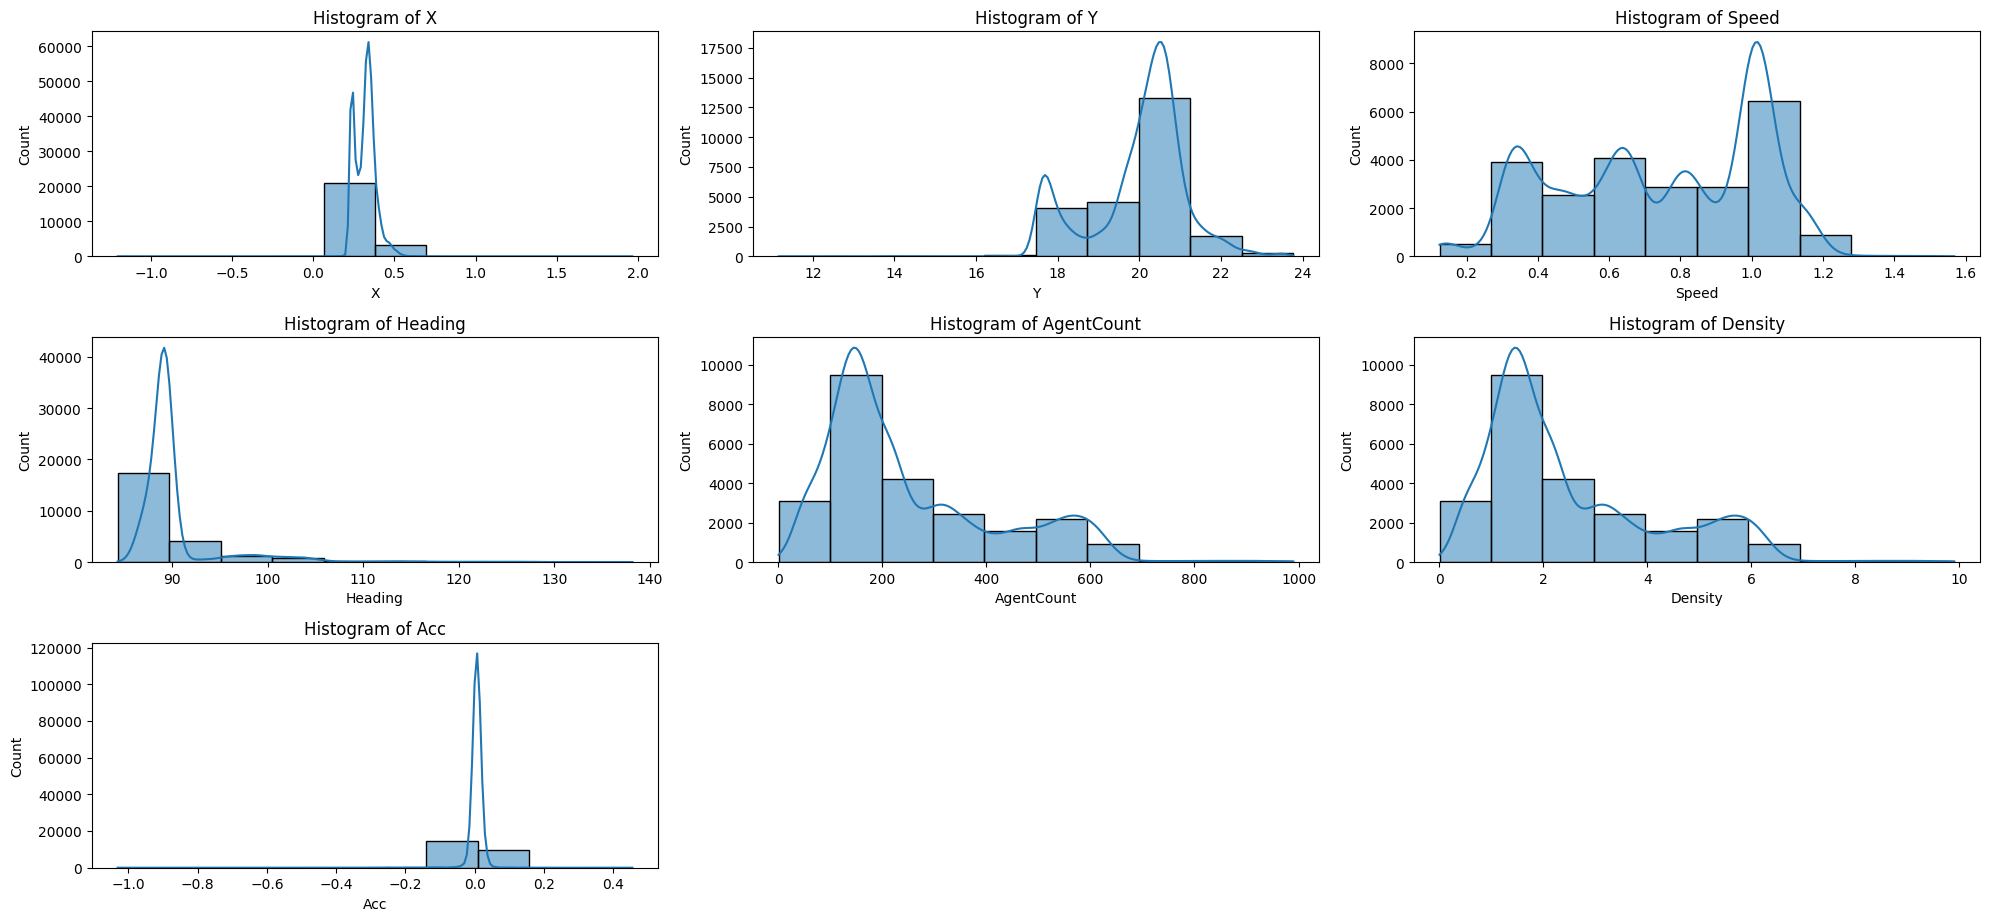

In [24]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_features):
    plt.subplot(5, 3, i + 1)
    sns.histplot(data=data, x=col, bins=10, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

In [25]:


categorical_cols = data.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['label2'], dtype='object')


<ipython-input-70-23ef75ed4a93>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1000x600 with 0 Axes>

ValueError: Image size of 589x75225 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

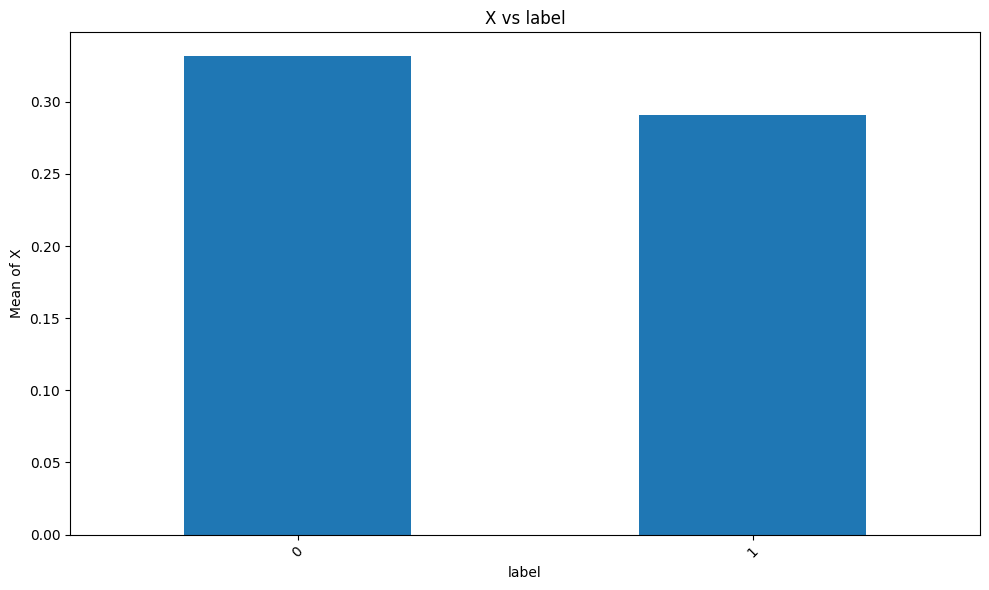

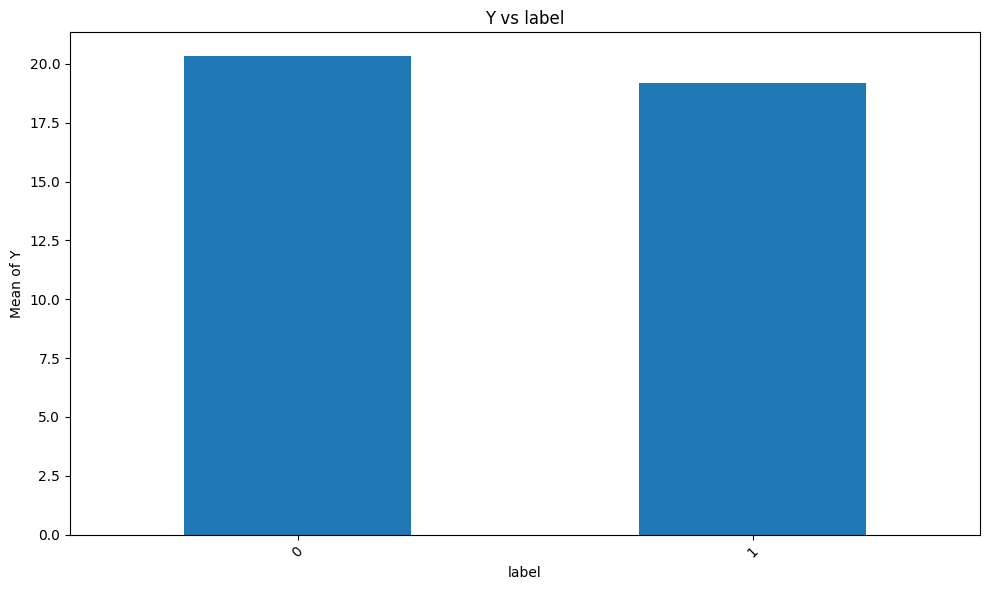

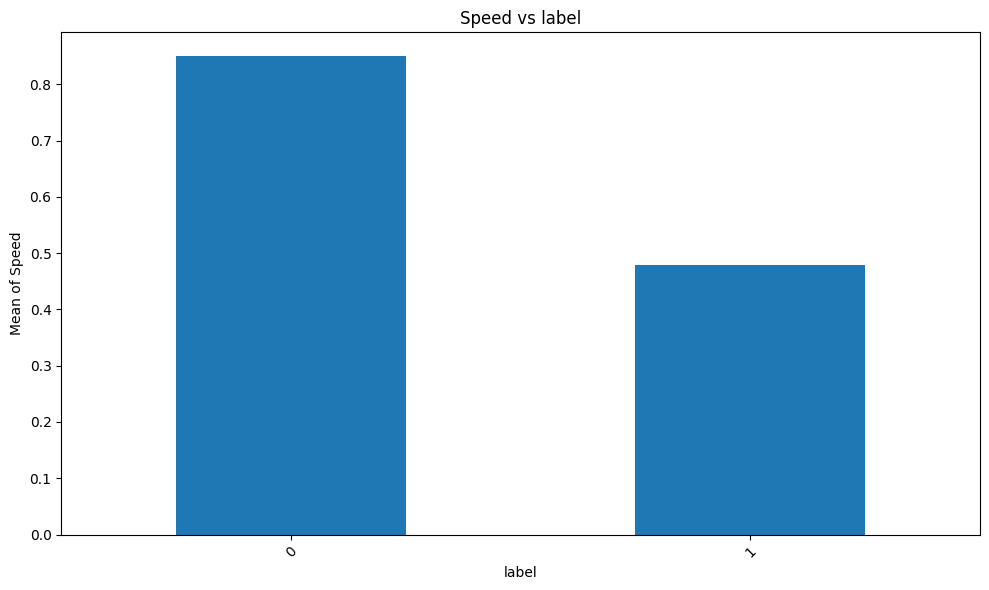

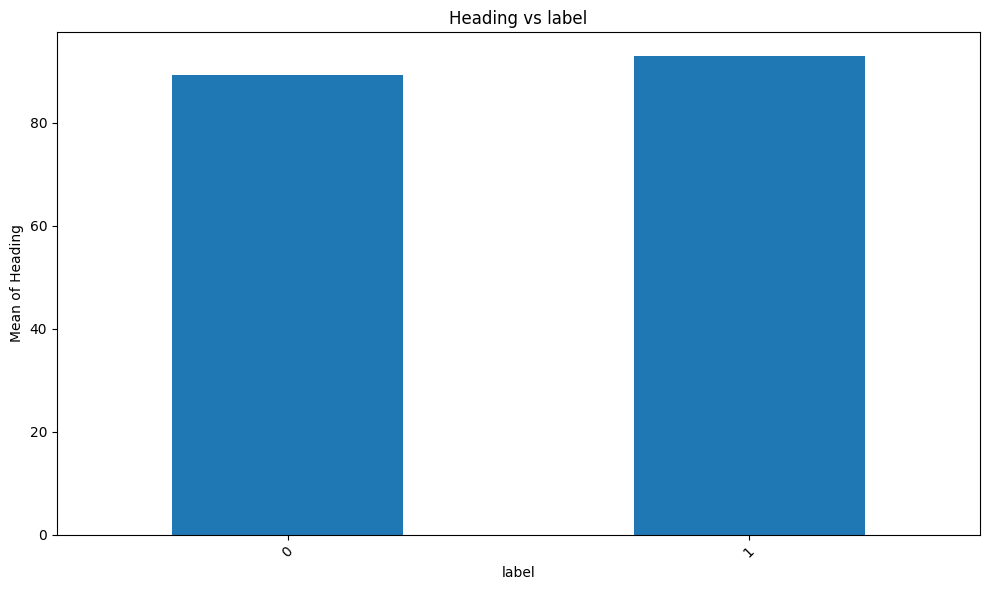

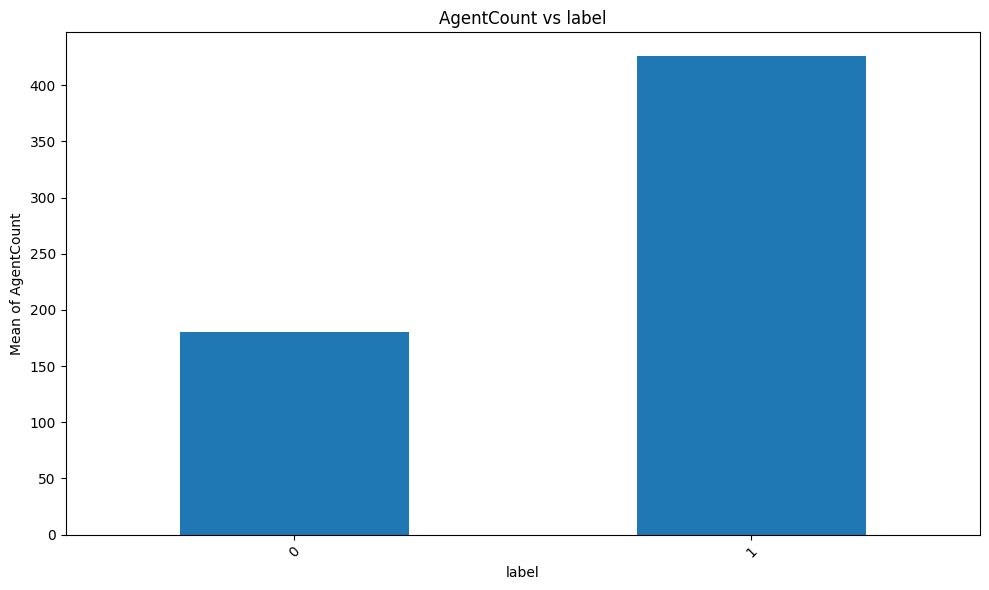

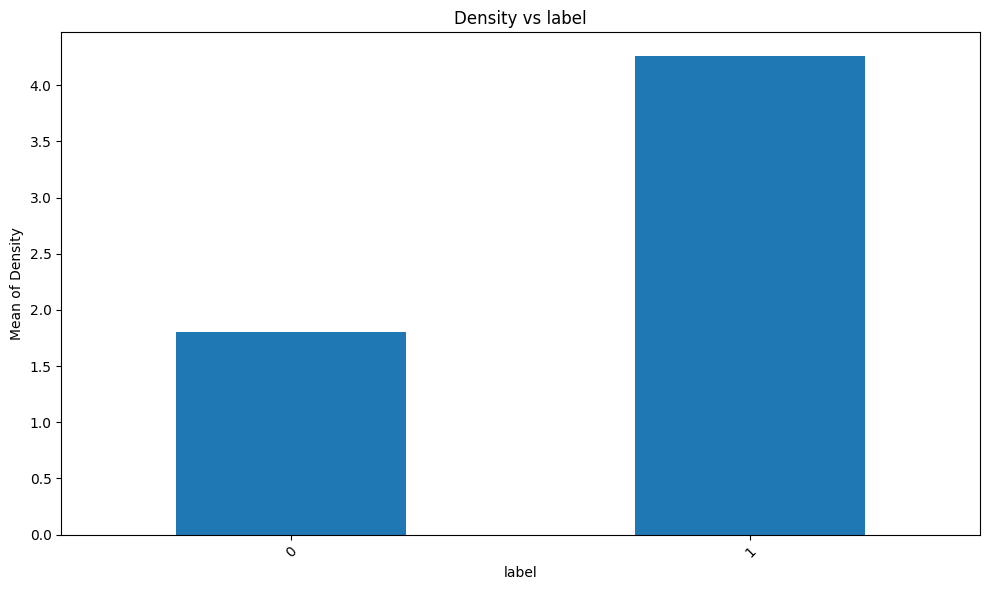

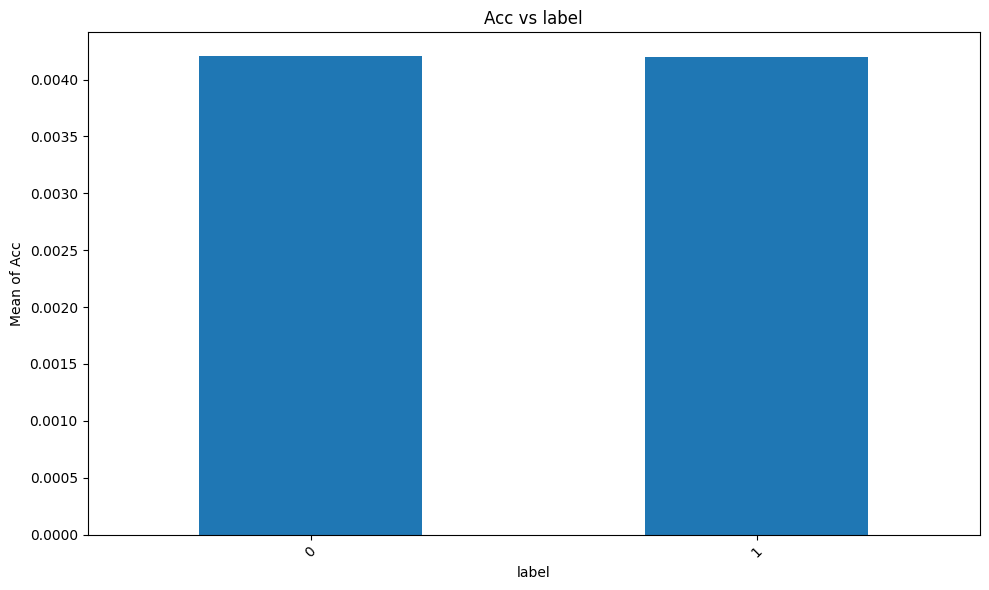

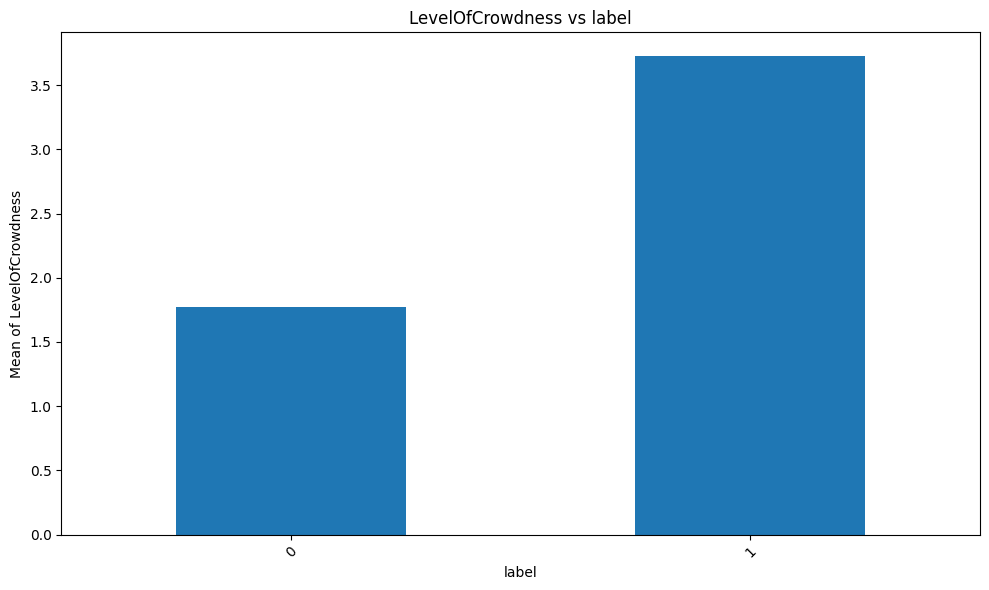

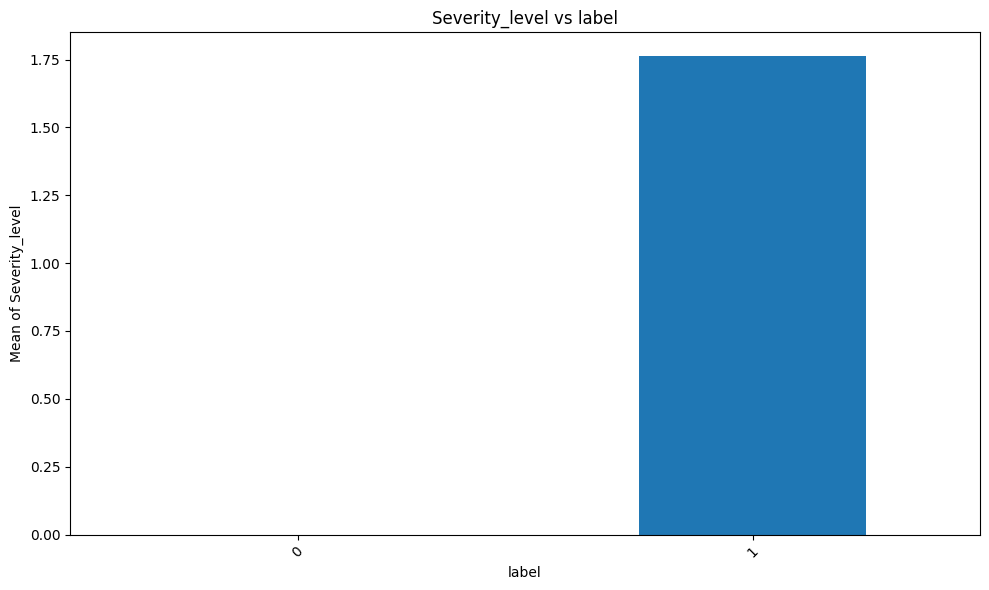

In [ ]:
# Define the columns to compare with the 'label' column
columns_to_compare = ['timestamp', 'X', 'Y', 'Speed', 'Heading', 'AgentCount',
                      'Density', 'Acc', 'LevelOfCrowdness', 'Severity_level']

# Ensure that 'label' is in the DataFrame
if 'label' not in data.columns:
    raise ValueError("The DataFrame does not contain a 'label' column")

# Function to plot comparisons
def plot_comparisons(data, columns_to_compare, label_column='label'):
    for column in columns_to_compare:
        plt.figure(figsize=(10, 6))

        # Check if column is numeric or categorical
        if data[column].dtype in ['int64', 'float64']:
            # Create bar plot for numeric columns
            data.groupby(label_column)[column].mean().plot(kind='bar')
            plt.ylabel(f'Mean of {column}')
        else:
            # Create bar plot for categorical columns
            data.groupby([label_column, column]).size().unstack().plot(kind='bar', stacked=True)
            plt.ylabel('Count')

        plt.title(f'{column} vs {label_column}')
        plt.xlabel(label_column)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Call the function to plot the comparisons
plot_comparisons(data, columns_to_compare)

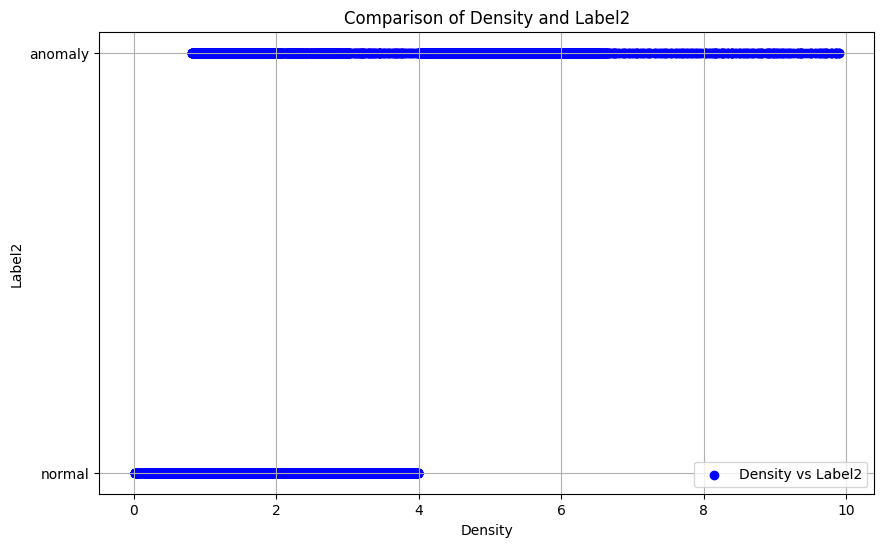

In [ ]:
# Create a DataFrame
file_path ='/content/drive/MyDrive/Crowd data for anomaly detection.csv'
df = pd.read_csv(file_path)


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['Density'], df['label2'], color='blue', label='Density vs Label2')
plt.title('Comparison of Density and Label2')
plt.xlabel('Density')
plt.ylabel('Label2')
plt.legend()
plt.grid(True)
plt.show()

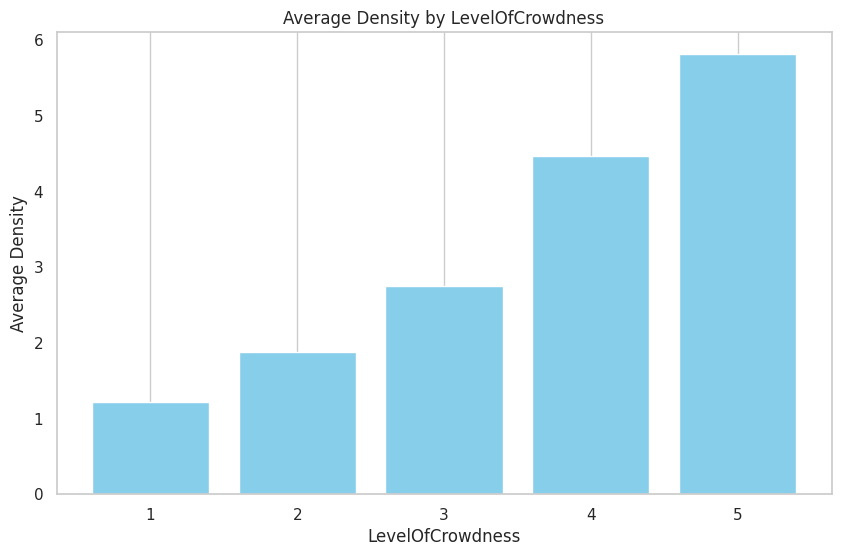

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/Crowd data for anomaly detection.csv'
df = pd.read_csv(file_path)

# Aggregate data by LevelOfCrowdness and calculate average density
crowdedness_density = df.groupby('LevelOfCrowdness')['Density'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(crowdedness_density['LevelOfCrowdness'], crowdedness_density['Density'], color='skyblue')
plt.title('Average Density by LevelOfCrowdness')
plt.xlabel('LevelOfCrowdness')
plt.ylabel('Average Density')
plt.grid(axis='y')
plt.show()


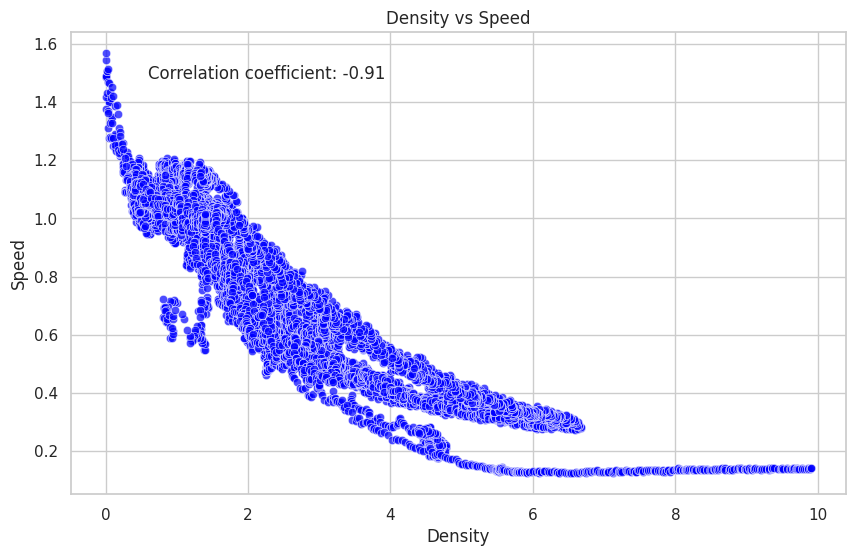

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/drive/MyDrive/Crowd data for anomaly detection.csv'
df = pd.read_csv(file_path)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Density', y='Speed', data=df, color='blue', alpha=0.7)
plt.title('Density vs Speed')
plt.xlabel('Density')
plt.ylabel('Speed')
plt.grid(True)

# Calculate correlation coefficient
correlation_coefficient = df['Density'].corr(df['Speed'])

# Annotate the correlation coefficient on the plot
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)

plt.show()


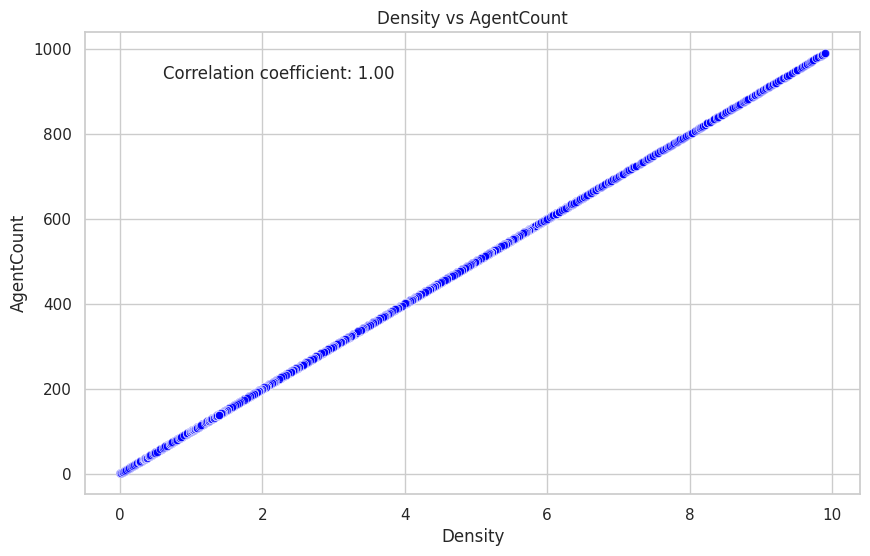

In [ ]:
#AgentCount
# Load the data
file_path = '/content/drive/MyDrive/Crowd data for anomaly detection.csv'
df = pd.read_csv(file_path)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Density', y='AgentCount', data=df, color='blue', alpha=0.7)
plt.title('Density vs AgentCount')
plt.xlabel('Density')
plt.ylabel('AgentCount')
plt.grid(True)

# Calculate correlation coefficient
correlation_coefficient = df['Density'].corr(df['AgentCount'])

# Annotate the correlation coefficient on the plot
plt.text(0.1, 0.9, f'Correlation coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes)

plt.show()

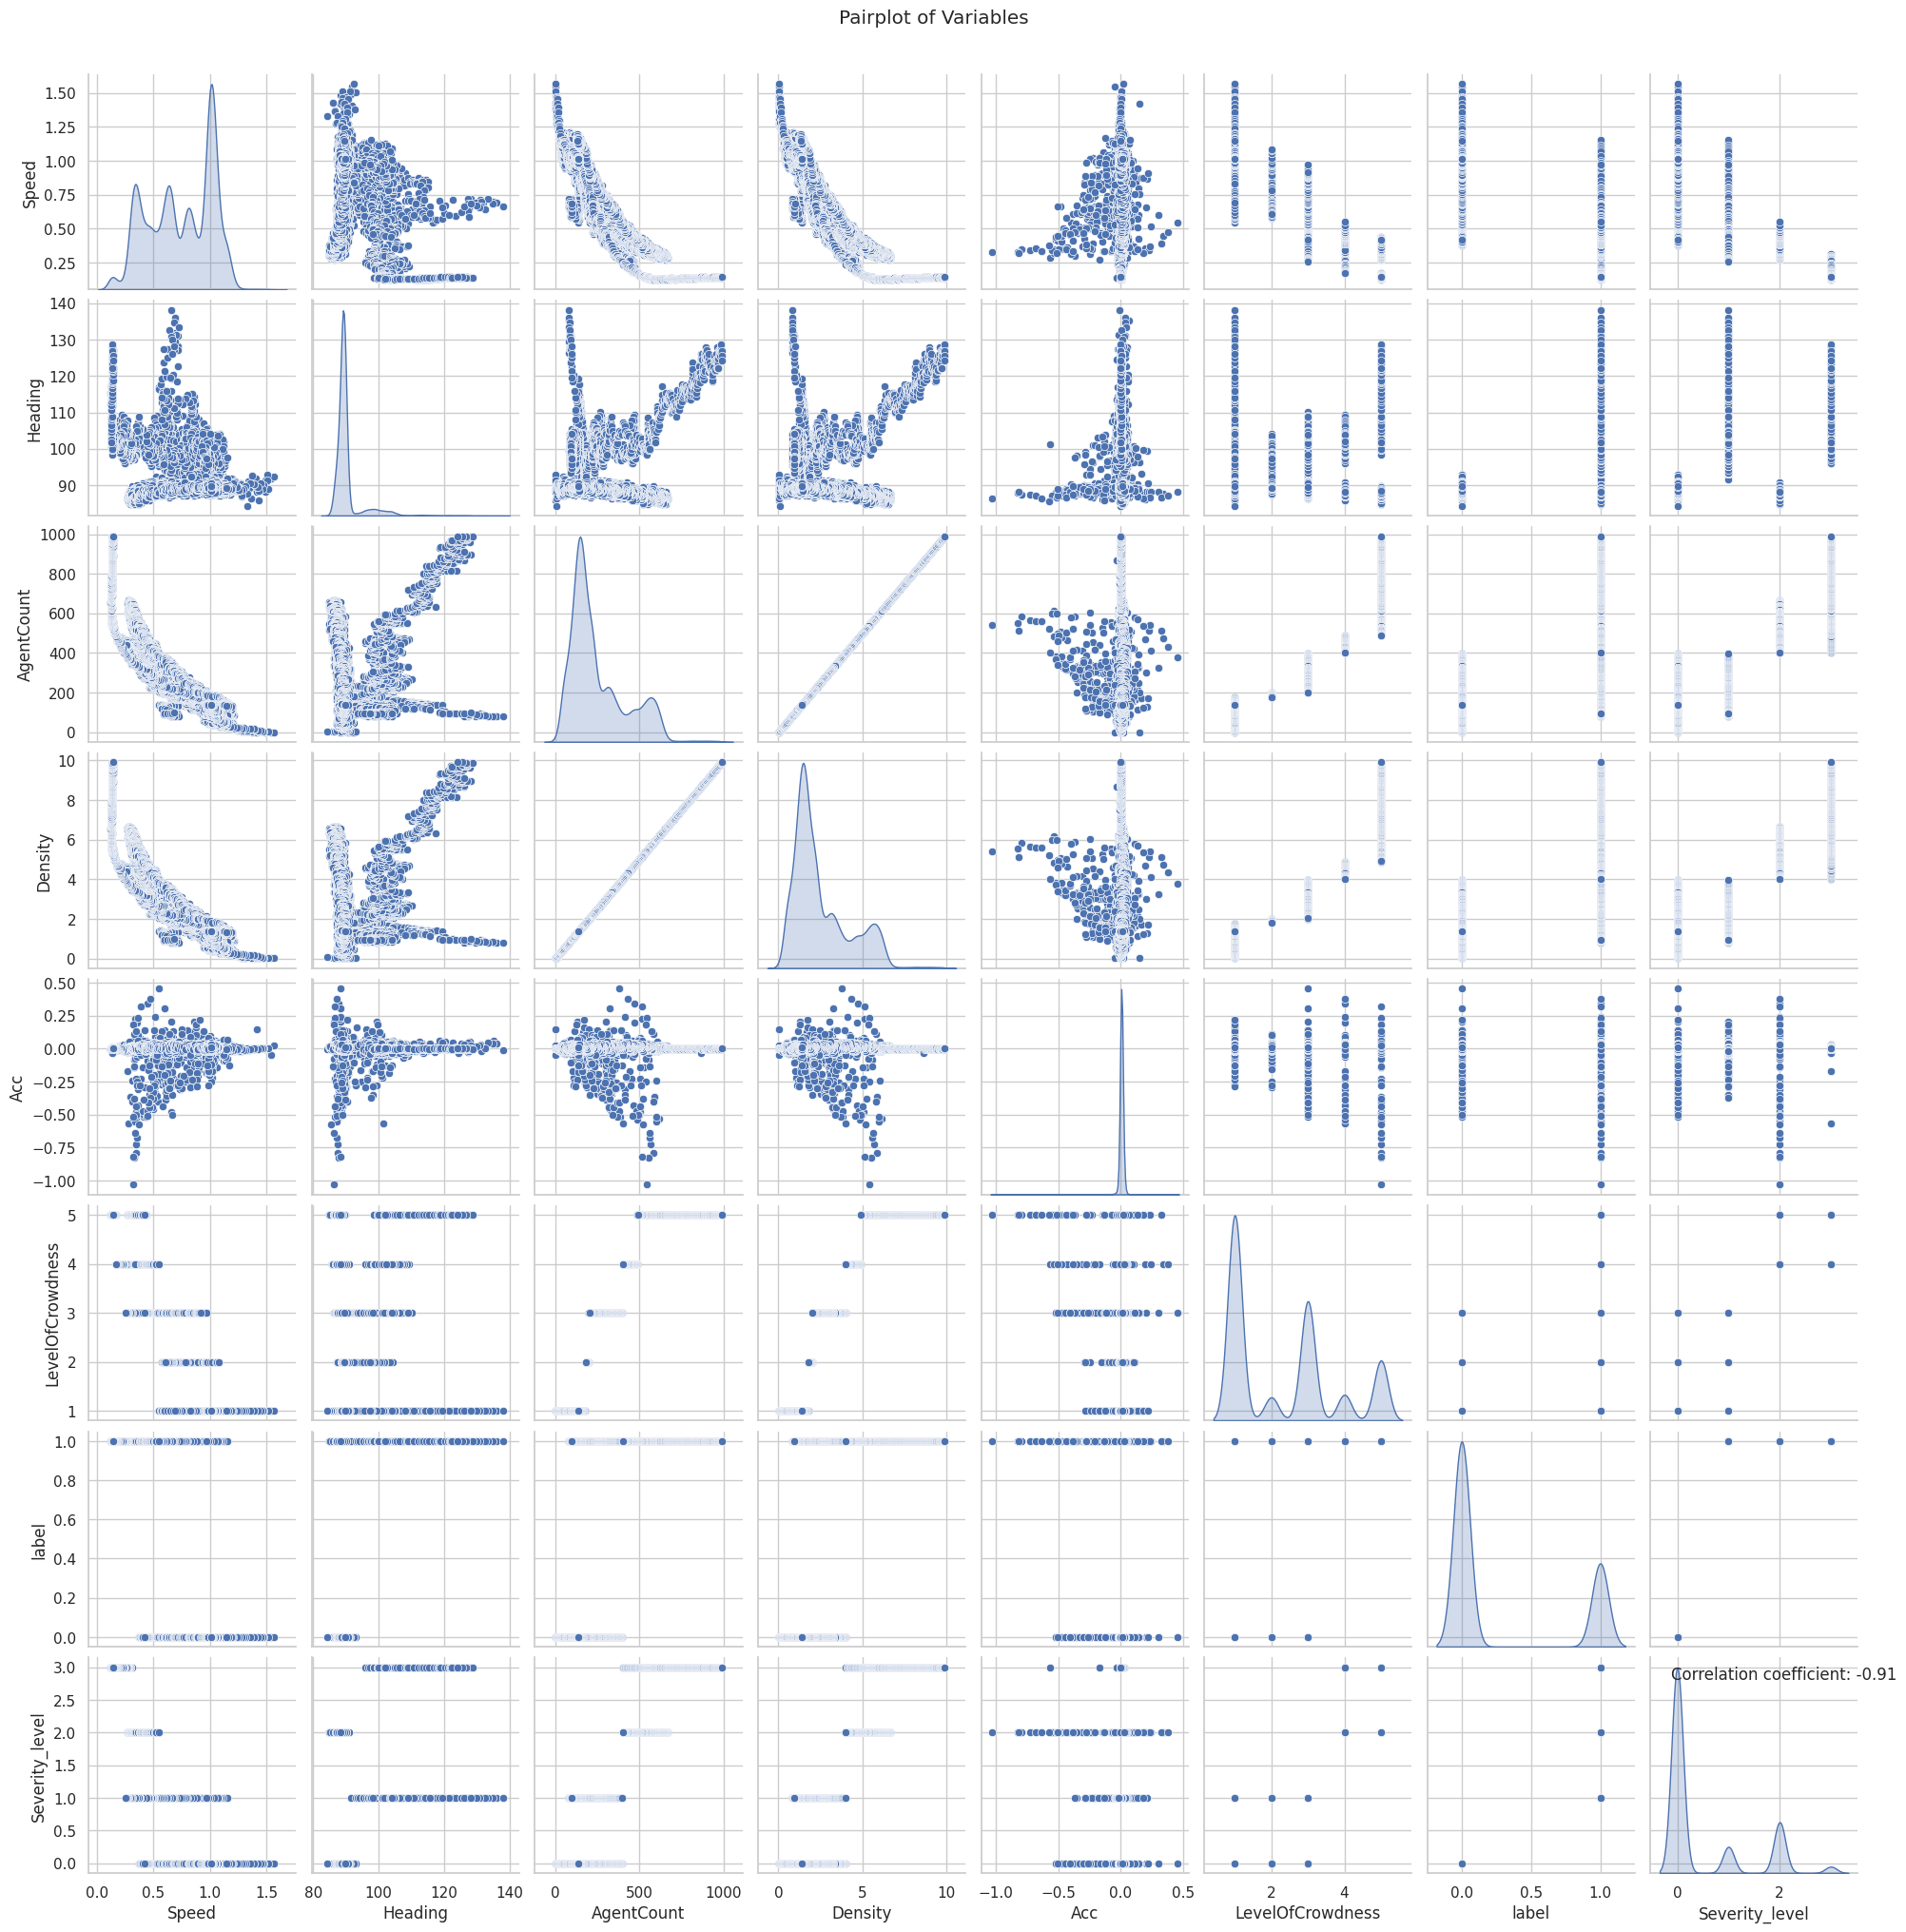

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/drive/MyDrive/Crowd data for anomaly detection.csv'
df = pd.read_csv(file_path)

# Select the columns for visualization
columns_to_visualize = ['Speed', 'Heading', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness', 'label', 'label2', 'Severity_level']

# Plotting pairplot
sns.pairplot(df[columns_to_visualize], diag_kind='kde')
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()


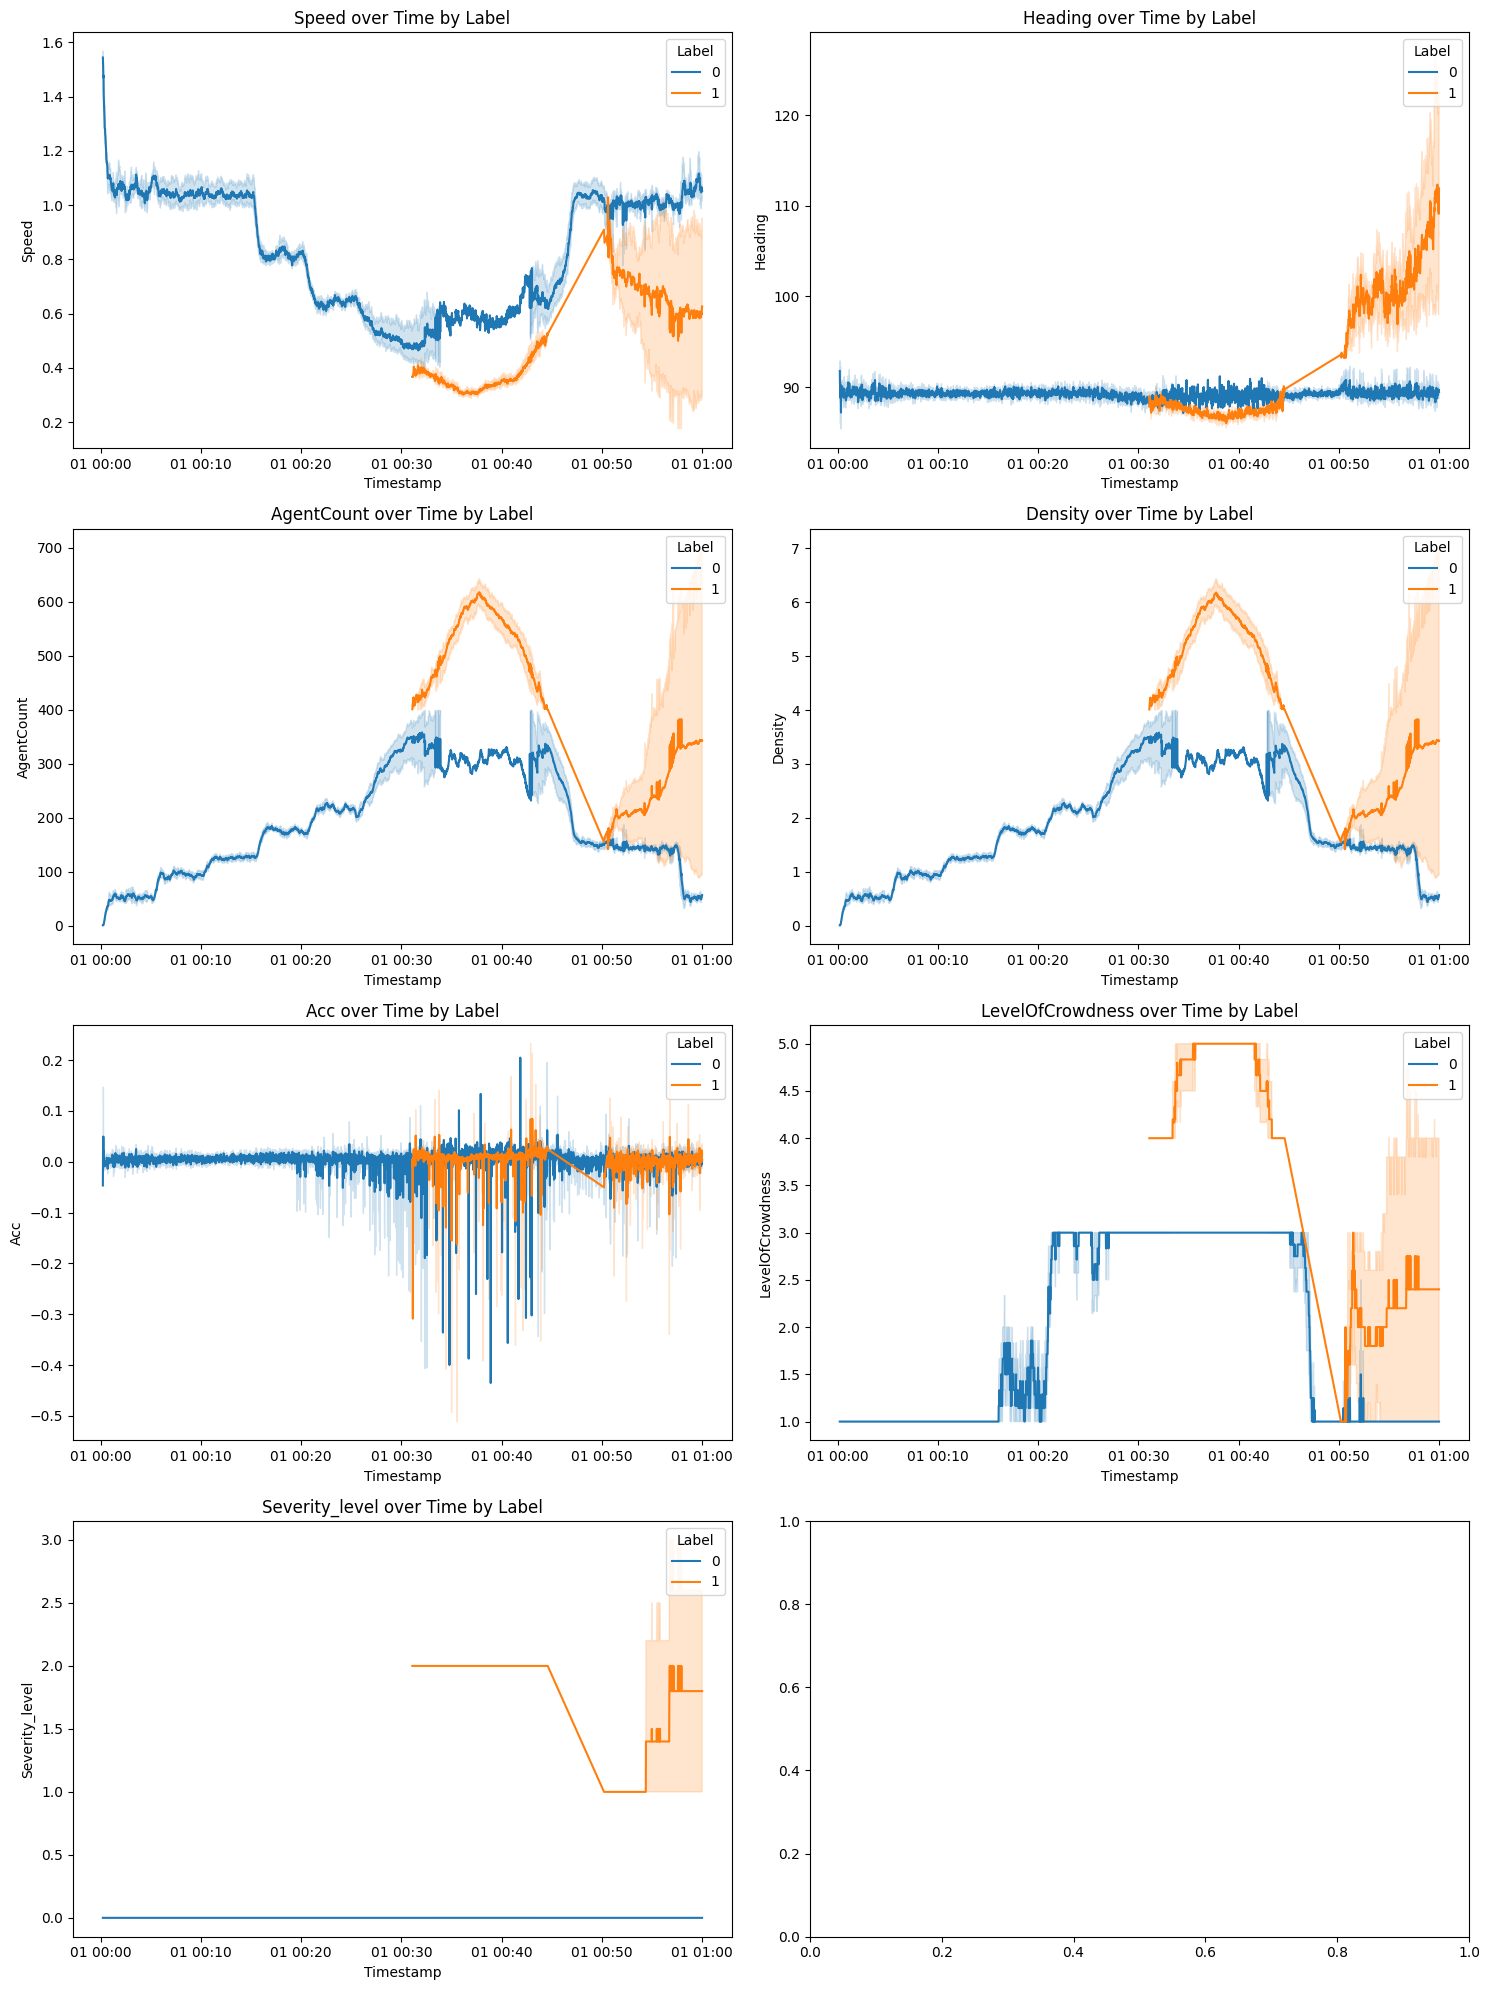

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Crowd data for anomaly detection.csv')



# Convert timestamp to a pandas datetime object for better plotting
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%H:%M:%S')

# Sort the dataframe by timestamp
df = df.sort_values('timestamp')

# Define the columns to be compared with 'label'
columns_to_compare = ['Speed', 'Heading', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness', 'Severity_level']

# Create a figure for the line plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Generate line plots
for i, column in enumerate(columns_to_compare):
    sns.lineplot(data=df, x='timestamp', y=column, hue='label', ax=axes[i])
    axes[i].set_title(f'{column} over Time by Label')
    axes[i].set_xlabel('Timestamp')
    axes[i].set_ylabel(column)
    axes[i].legend(title='Label', loc='upper right')

# Adjust the layout
plt.tight_layout()
plt.show()


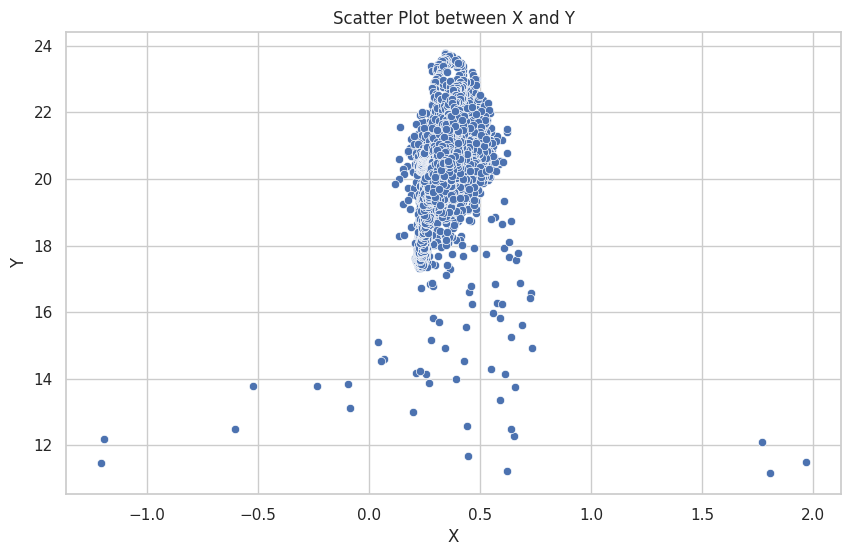

In [28]:
# Scatter plot between 'X' and 'Y'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='X', y='Y', data=data)
plt.title('Scatter Plot between X and Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

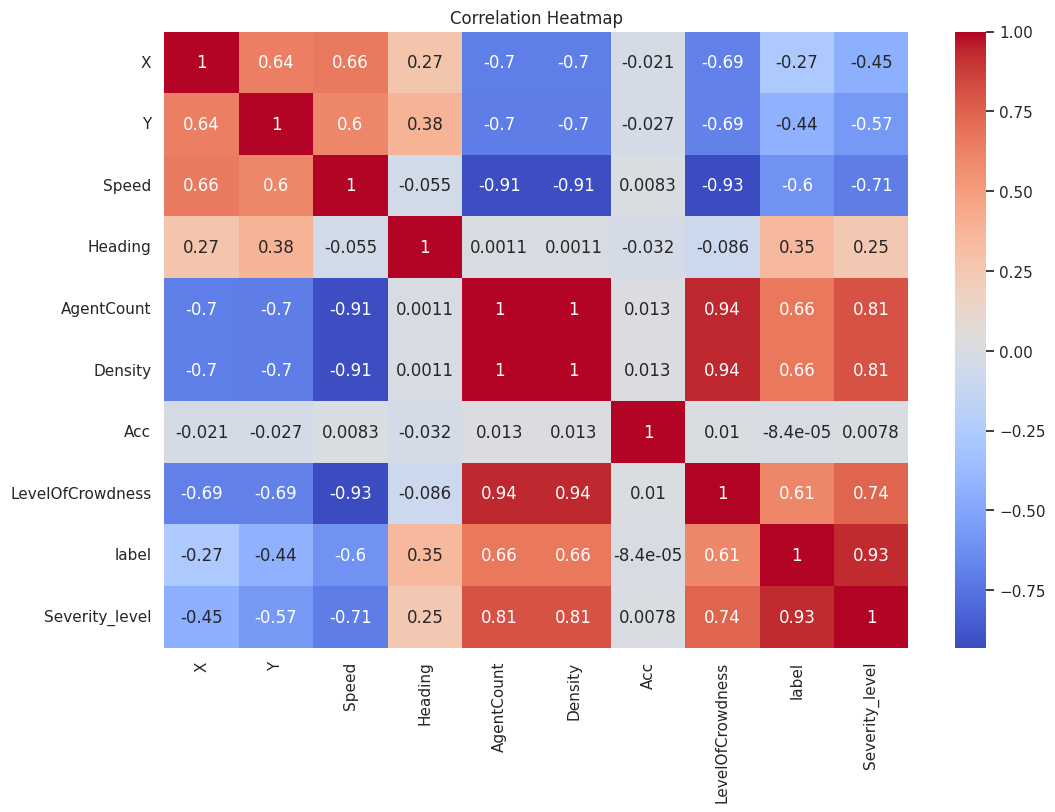

In [30]:
#  heatmap of correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### IQR

In [33]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Crowd data for anomaly detection.csv')

# Define a function to detect outliers using IQR and return detailed information
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    non_outliers = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    accuracy = non_outliers.shape[0] / data.shape[0]
    return {
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'total_outliers': outliers.shape[0],
        'accuracy': accuracy
    }

# Columns to check for outliers
columns = ['X','Y','Speed', 'Heading', 'AgentCount', 'Density', 'Acc']

# Store outlier details
outliers_details = {}
total_accuracy = 0.0
for col in columns:
    details = detect_outliers_iqr(data, col)
    outliers_details[col] = details
    total_accuracy += details['accuracy']

# Calculate total accuracy
total_accuracy /= len(columns)

# Print the results
print(f'Total accuracy across all columns: {total_accuracy * 100:.2f}%')
for col, details in outliers_details.items():
    print(f'Column: {col}')
    print(f'  Lower bound: {details["lower_bound"]}')
    print(f'  Upper bound: {details["upper_bound"]}')
    print(f'  Total outliers: {details["total_outliers"]}')
    print(f'  Accuracy (percentage of data within bounds): {details["accuracy"] * 100:.2f}%')
    print('')


Total accuracy across all columns: 95.10%
Column: X
  Lower bound: 0.12605000000000002
  Upper bound: 0.49524999999999997
  Total outliers: 280
  Accuracy (percentage of data within bounds): 98.84%

Column: Y
  Lower bound: 17.899900000000002
  Upper bound: 22.368700000000004
  Total outliers: 3004
  Accuracy (percentage of data within bounds): 87.55%

Column: Speed
  Lower bound: -0.26710000000000017
  Upper bound: 1.7697000000000003
  Total outliers: 0
  Accuracy (percentage of data within bounds): 100.00%

Column: Heading
  Lower bound: 86.49272500000002
  Upper bound: 91.781325
  Total outliers: 3461
  Accuracy (percentage of data within bounds): 85.65%

Column: AgentCount
  Lower bound: -169.0
  Upper bound: 639.0
  Total outliers: 284
  Accuracy (percentage of data within bounds): 98.82%

Column: Density
  Lower bound: -1.6899999999999993
  Upper bound: 6.389999999999999
  Total outliers: 286
  Accuracy (percentage of data within bounds): 98.81%

Column: Acc
  Lower bound: -0.024

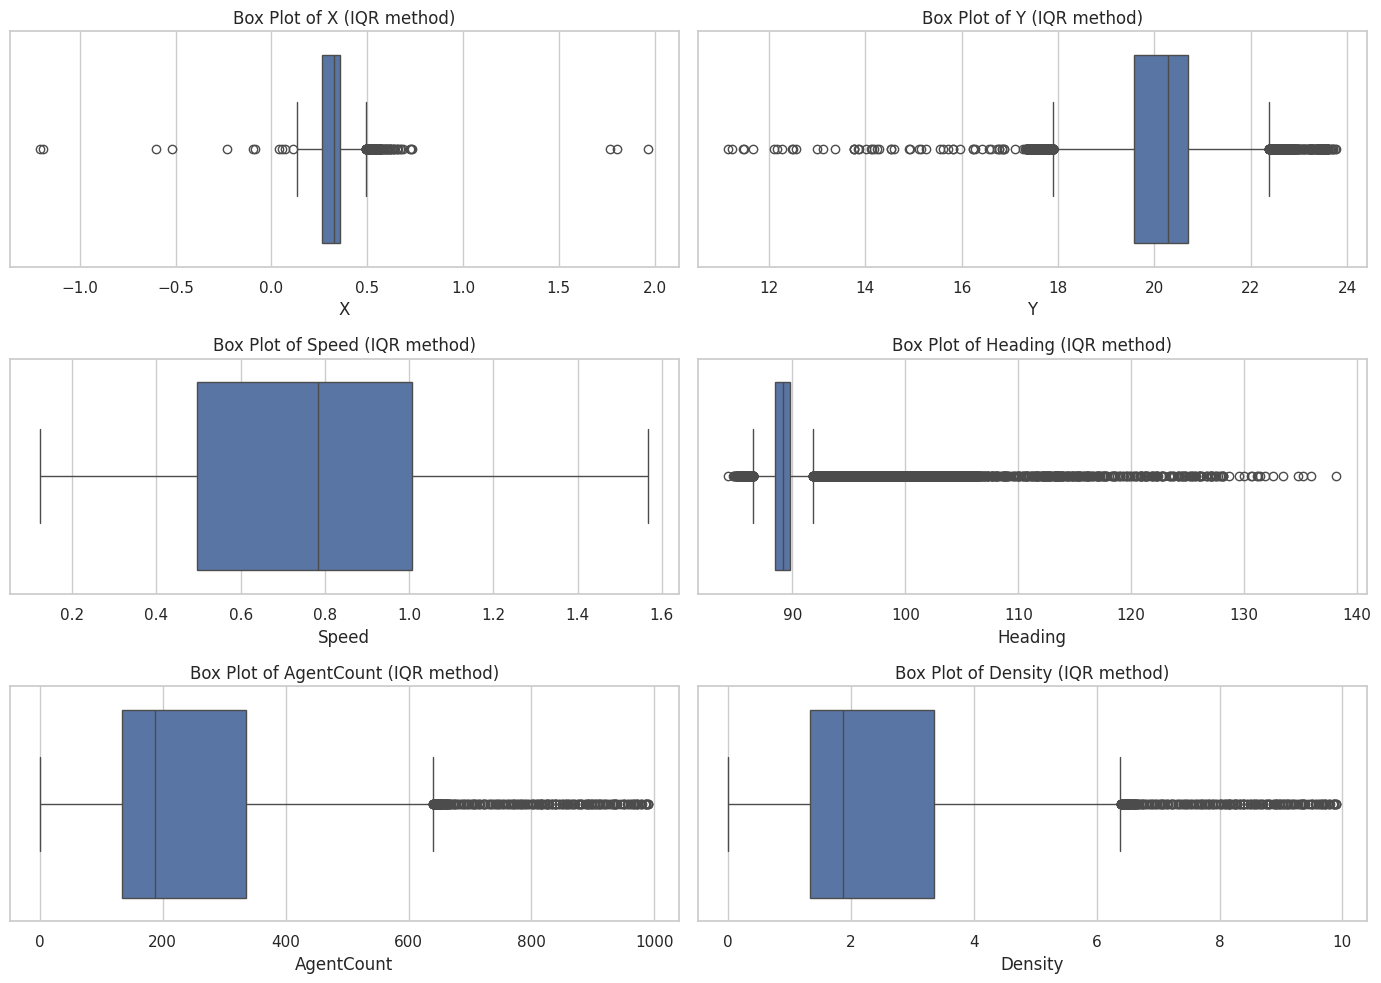

In [61]:
# Plotting the outliers for each feature
plt.figure(figsize=(14, 10))
for i, feature in enumerate(columns, 1):
    if i <= 6:  # Check if the subplot index is within the valid range
        plt.subplot(3, 2, i)
        sns.boxplot(x=data[feature])
        plt.title(f'Box Plot of {feature} (IQR method)')
plt.tight_layout()
plt.show()

## Z SCORE

Total outliers detected in X using Z-Score: 128
Total outliers detected in Y using Z-Score: 50
Total outliers detected in Speed using Z-Score: 0
Total outliers detected in Heading using Z-Score: 510
Total outliers detected in AgentCount using Z-Score: 140
Total outliers detected in Density using Z-Score: 140
Total outliers detected in Acc using Z-Score: 254
Total outliers detected in LevelOfCrowdness using Z-Score: 0
Total outliers detected in label using Z-Score: 0
Total outliers detected in Severity_level using Z-Score: 0


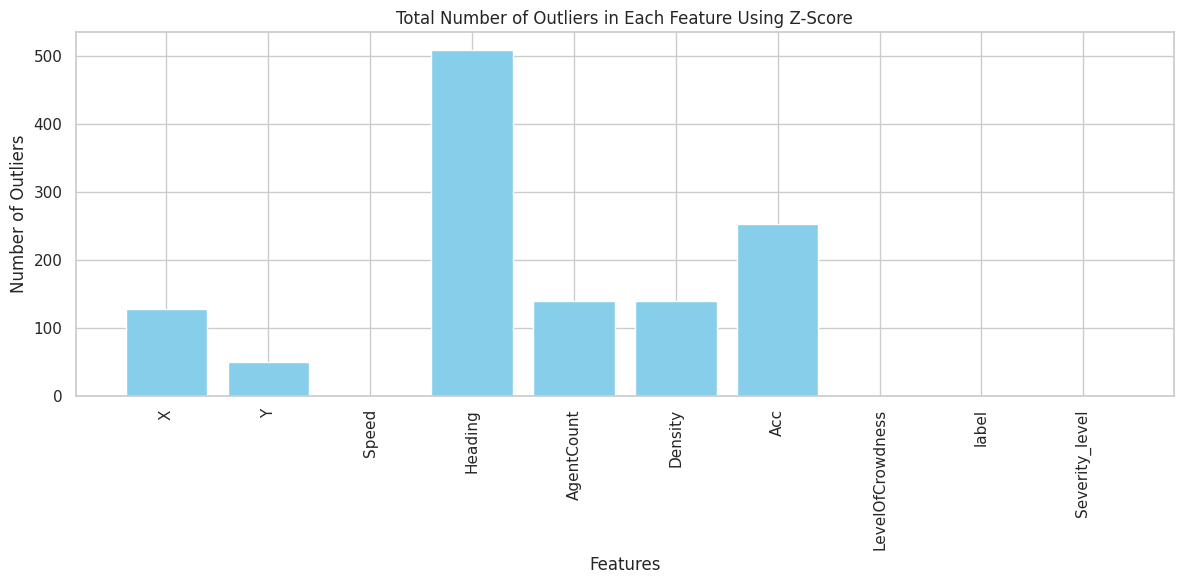

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

# Z-Score for outlier detection
def detect_outliers_zscore(data, column, threshold=3):
    z_scores = zscore(data[column])
    return data[(z_scores > threshold) | (z_scores < -threshold)]

# Detecting outliers for each feature using Z-Score and counting them
outlier_counts = {}
for column in standardized_data.columns:
    outliers = detect_outliers_zscore(standardized_data, column)
    outlier_counts[column] = len(outliers)
    print(f"Total outliers detected in {column} using Z-Score: {outlier_counts[column]}")


# Plotting the total number of outliers in each column
plt.figure(figsize=(12, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values(), color='skyblue')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.title('Total Number of Outliers in Each Feature Using Z-Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

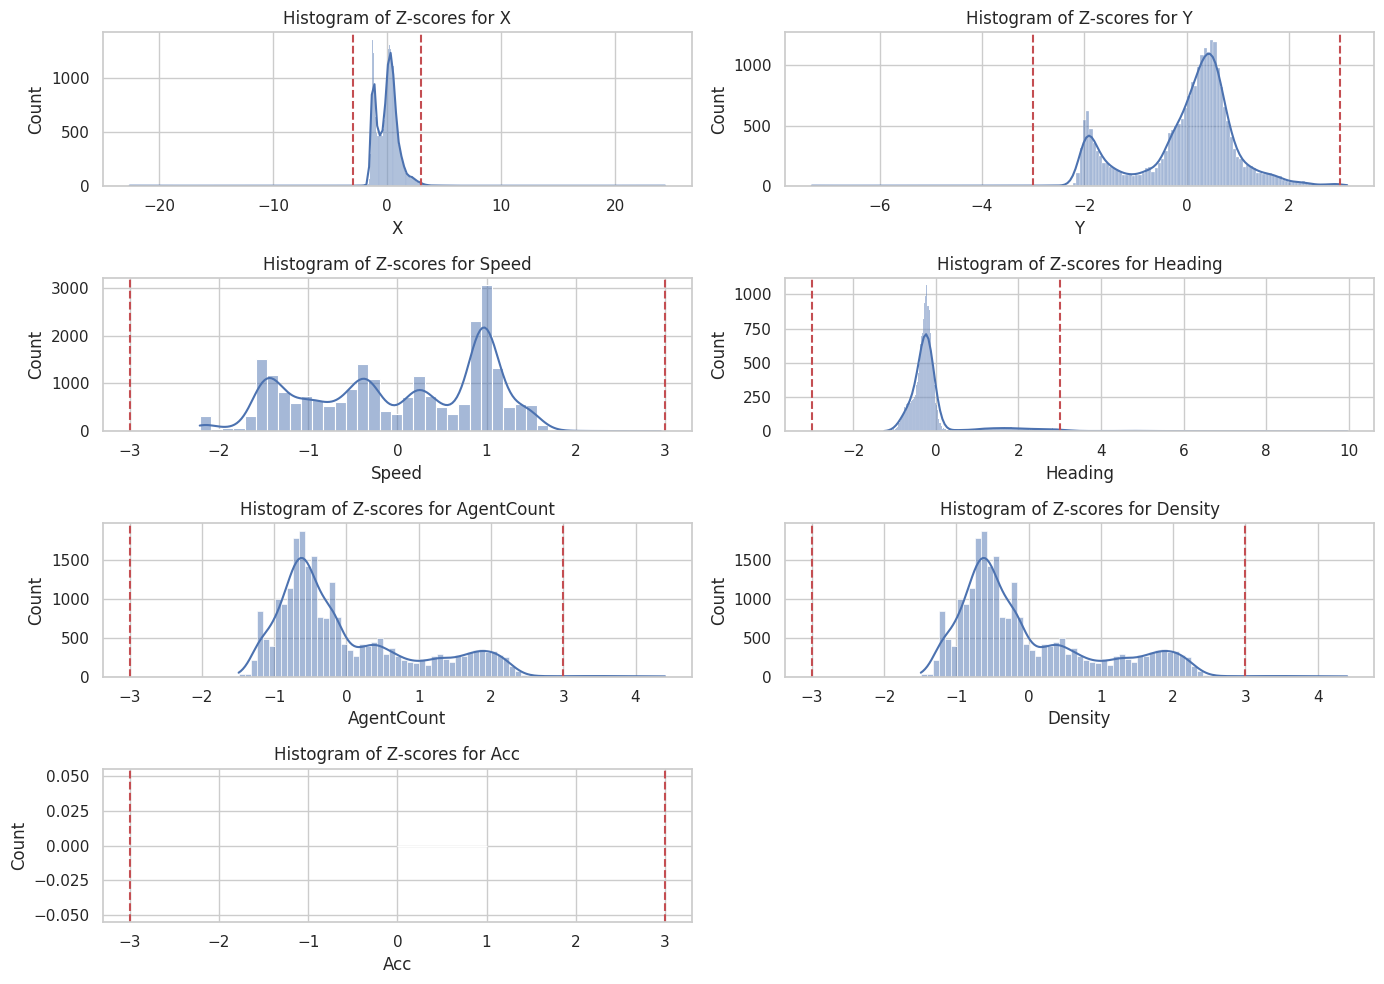

In [60]:
# Plotting the outliers for each feature
plt.figure(figsize=(14, 10))
for i, feature in enumerate(columns, 1):
    plt.subplot(4, 2, i)  # Adjusted grid layout to accommodate all features
    sns.histplot(data_z[feature], kde=True)
    plt.axvline(3, color='r', linestyle='--')
    plt.axvline(-3, color='r', linestyle='--')
    plt.title(f'Histogram of Z-scores for {feature}')
plt.tight_layout()
plt.show()

## Isolation Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(



Anomaly detection using Isolation Forest:
anomaly_iso
 1    21710
-1     2413
Name: count, dtype: int64
Column: X
  Total outliers: 1205

Column: Y
  Total outliers: 1206

Column: Speed
  Total outliers: 1206

Column: Heading
  Total outliers: 1206

Column: AgentCount
  Total outliers: 1196

Column: Density
  Total outliers: 1196

Column: Acc
  Total outliers: 1193

Total number of outliers detected by Isolation Forest: 2413


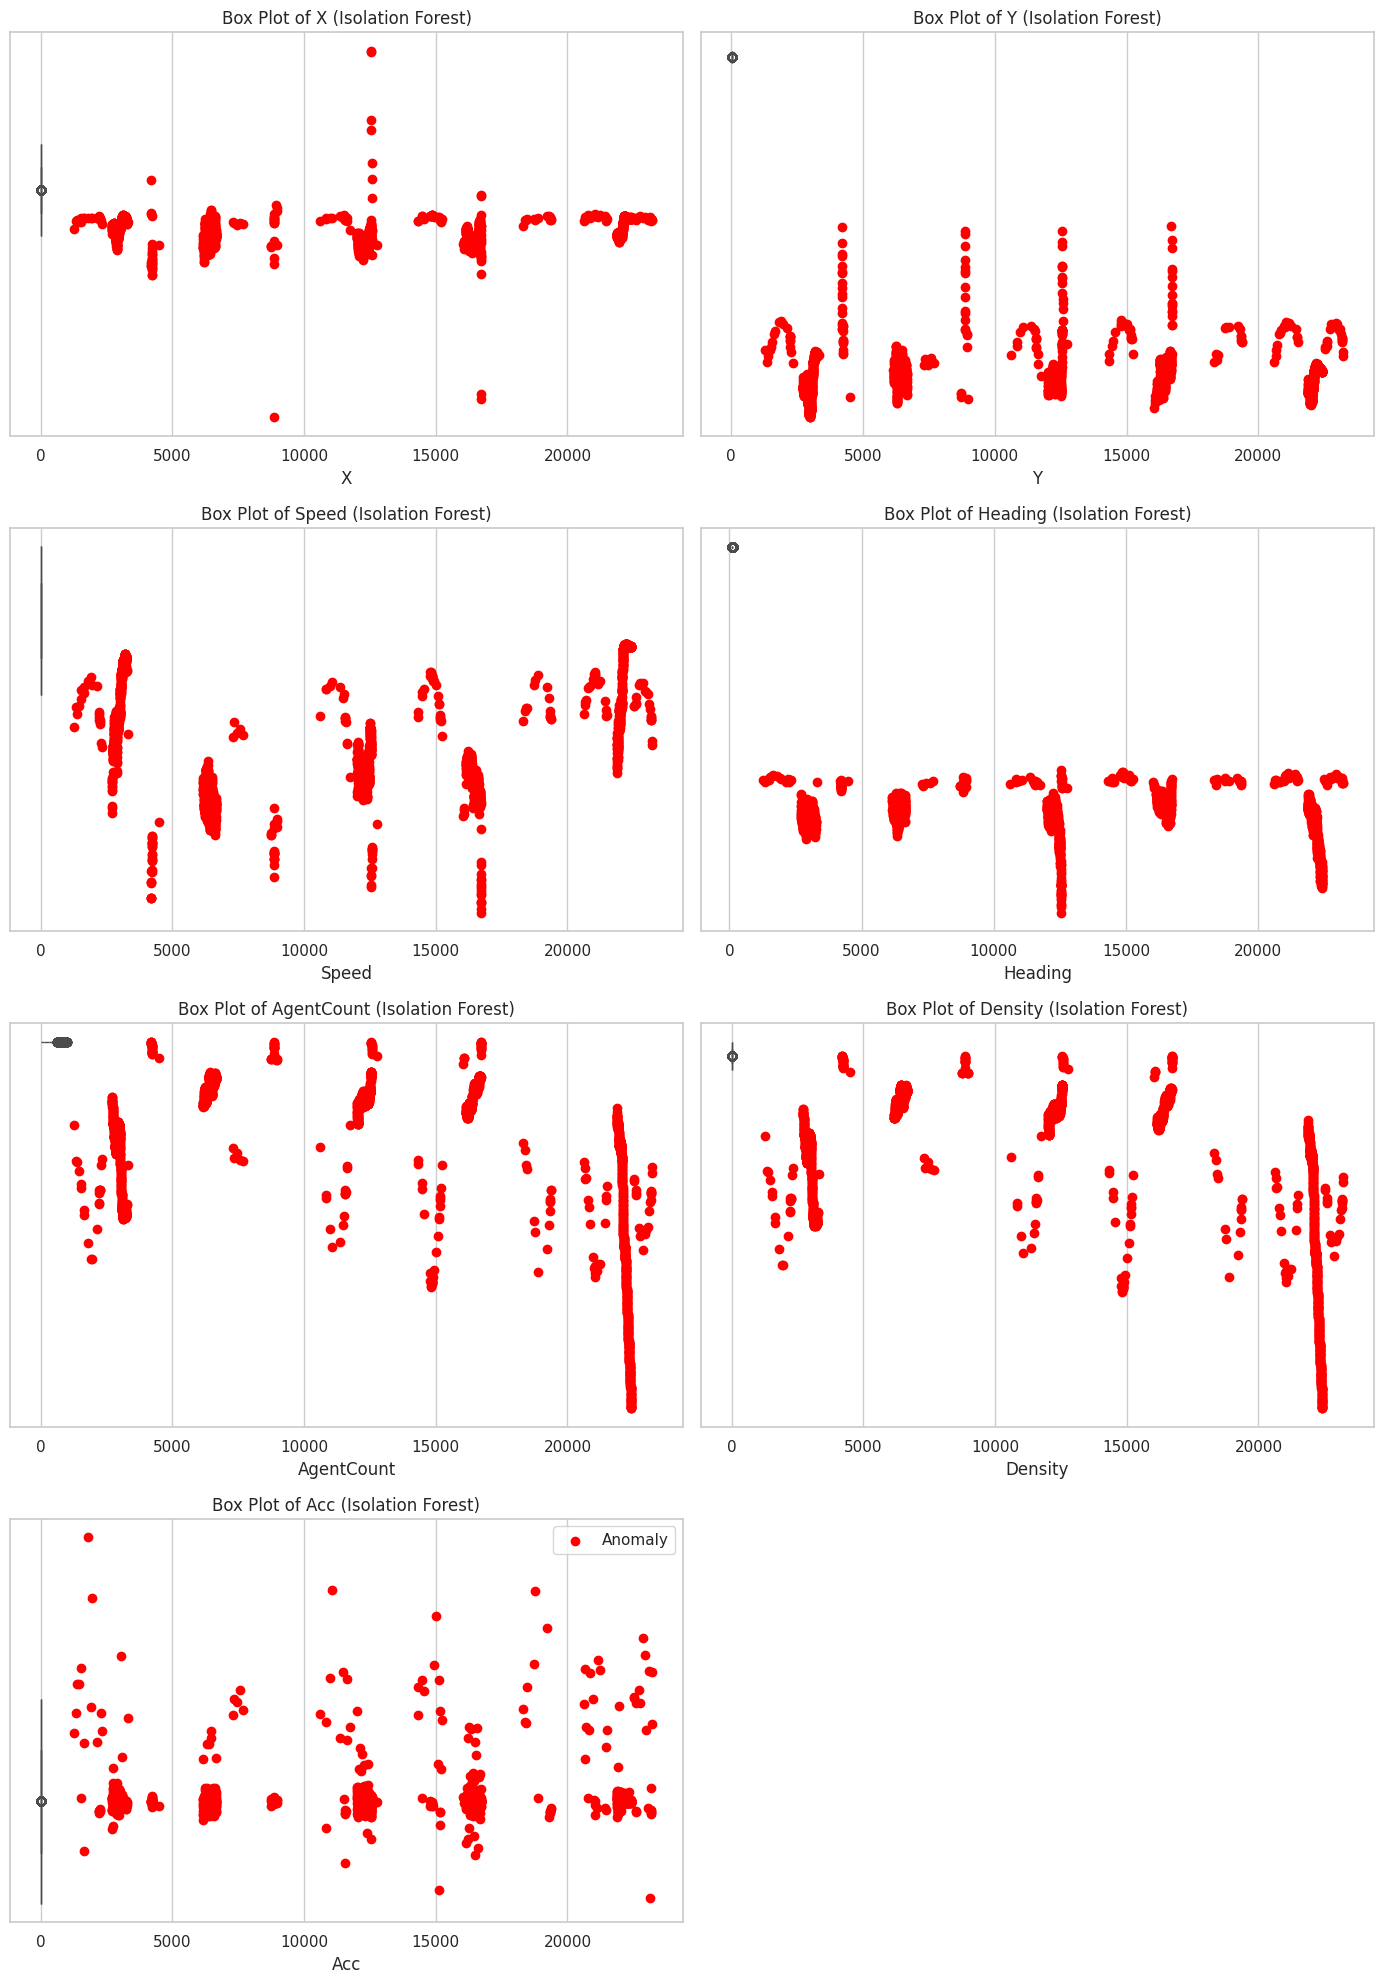

In [50]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

# Handle missing values (NaN) using imputation
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with the mean of each column
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=['float64', 'int64'])))
data_imputed.columns = data.select_dtypes(include=['float64', 'int64']).columns

iso_forest = IsolationForest(contamination=0.1, random_state=42)
data['anomaly_iso'] = iso_forest.fit_predict(data_imputed) # assign results to 'anomaly_iso'

# -1 for anomalies, 1 for normal points
print("\nAnomaly detection using Isolation Forest:")
print(data['anomaly_iso'].value_counts())


# Extract the anomalies
outliers_iso = data[data['anomaly_iso'] == -1] # use correct column name 'anomaly_iso' to filter



# Function to get outlier details for Isolation Forest
def detect_outliers_isolation_forest(data, feature):
    outliers = data[(data['anomaly_iso'] == -1) & ((data[feature] < data[feature].quantile(0.25)) | (data[feature] > data[feature].quantile(0.75)))] # use correct column name
    total_outliers = outliers.shape[0]
    return total_outliers

# Store outlier details
outliers_details_if = {}
for col in columns:
    outliers_details_if[col] = detect_outliers_isolation_forest(outliers_iso, col)

# Print the outlier details for each column
for col, total_outliers in outliers_details_if.items():
    print(f'Column: {col}')
    print(f'  Total outliers: {total_outliers}')
    print('')

print(f'Total number of outliers detected by Isolation Forest: {outliers_iso.shape[0]}')

# Plotting the outliers for each feature
# Adjust the figure layout to accommodate all features
num_columns = len(columns)
num_rows = (num_columns + 1) // 2  # Calculate the number of rows needed
plt.figure(figsize=(14, 5 * num_rows))  # Adjust figure height based on rows
for i, feature in enumerate(columns, 1):
    plt.subplot(num_rows, 2, i)  # Use calculated number of rows
    sns.boxplot(x=data[feature])
    plt.scatter(outliers_iso.index, outliers_iso[feature], color='red', label='Anomaly')
    plt.title(f'Box Plot of {feature} (Isolation Forest)')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-56-b085755b8753>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anomaly_labels, y=anomaly_counts.values, palette='pastel')


Text(0.5, 1.0, 'Anomaly Detection using Isolation Forest')

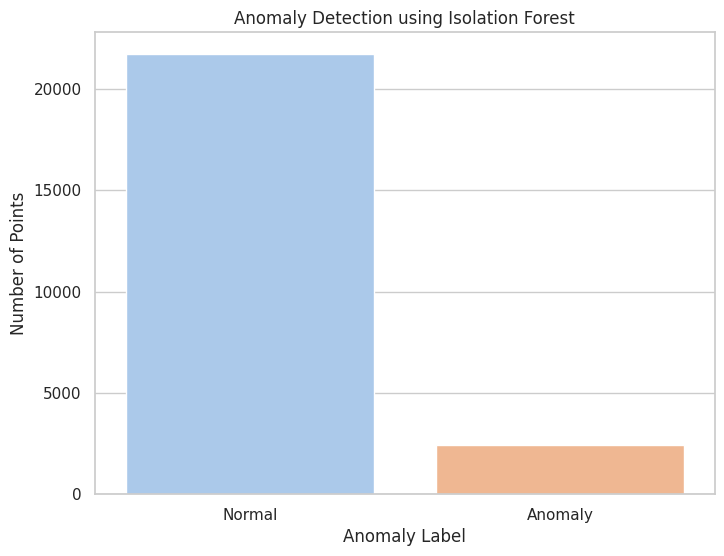

In [56]:
anomaly_counts = data['anomaly_iso'].value_counts() # Change 'df' to 'data'

anomaly_labels = anomaly_counts.index.map({-1: 'Anomaly', 1: 'Normal'})
plt.figure(figsize=(8, 6))
sns.barplot(x=anomaly_labels, y=anomaly_counts.values, palette='pastel')
plt.xlabel('Anomaly Label')
plt.ylabel('Number of Points')
plt.title('Anomaly Detection using Isolation Forest')

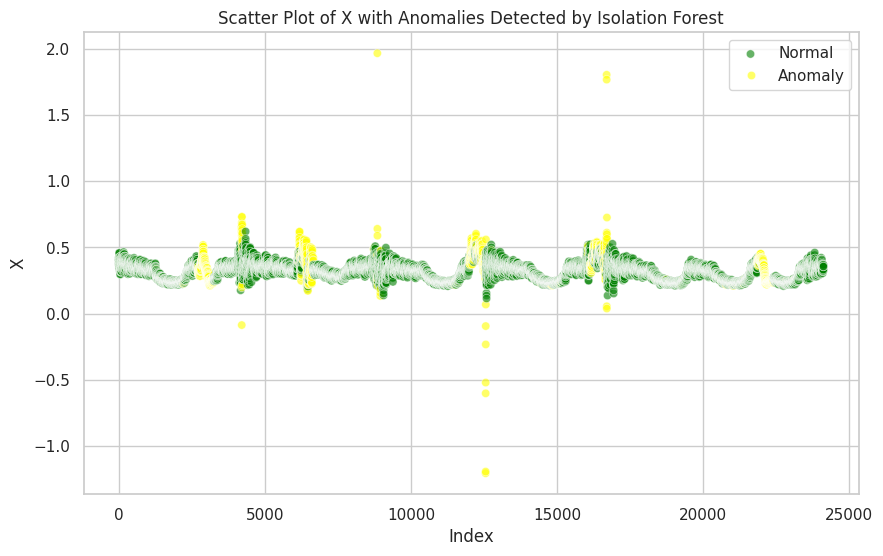

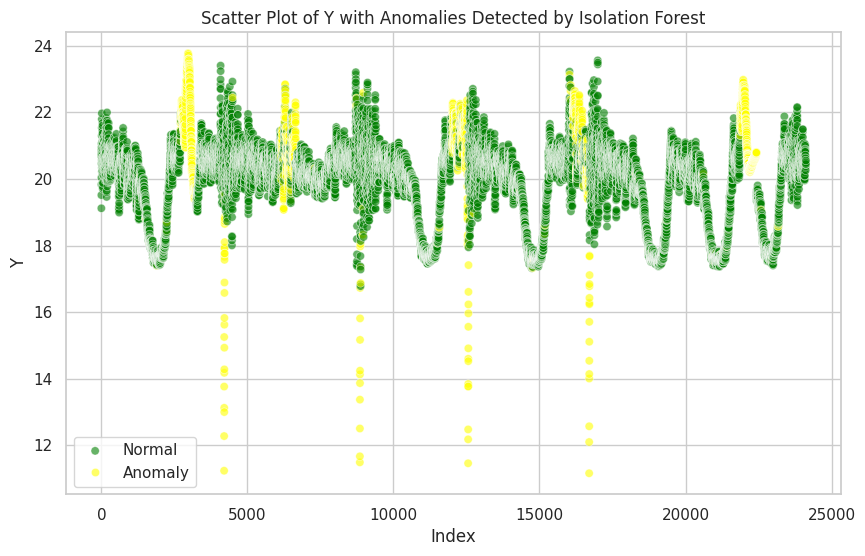

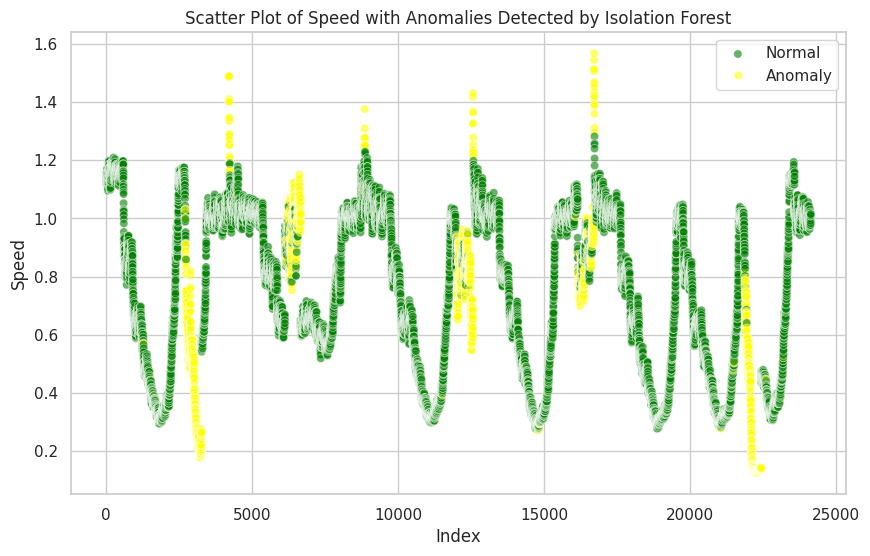

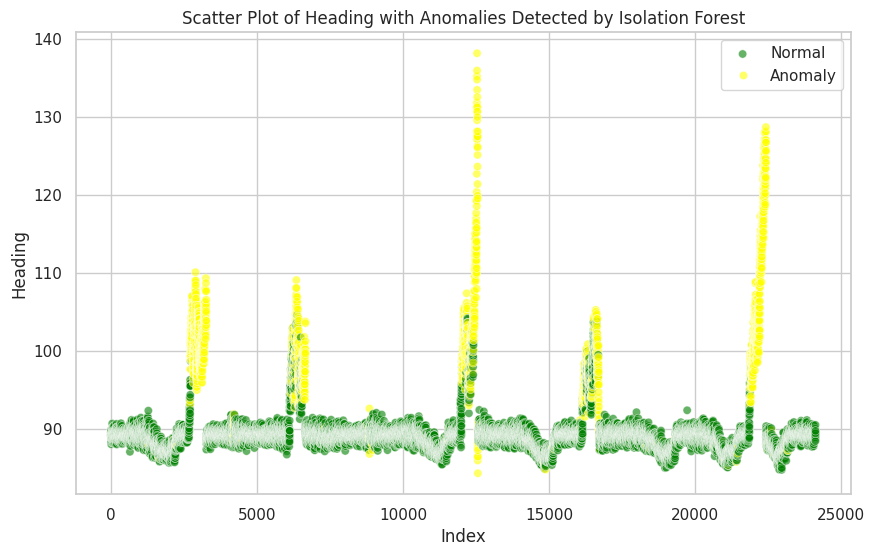

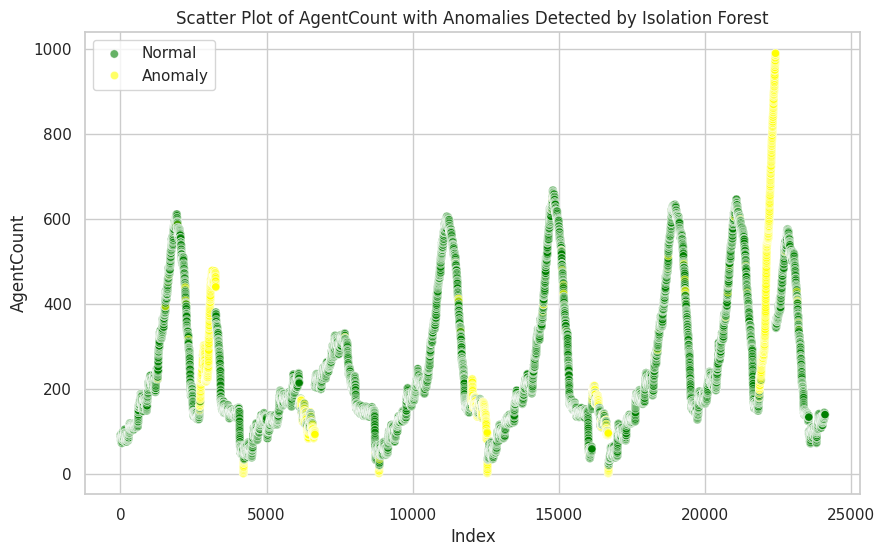

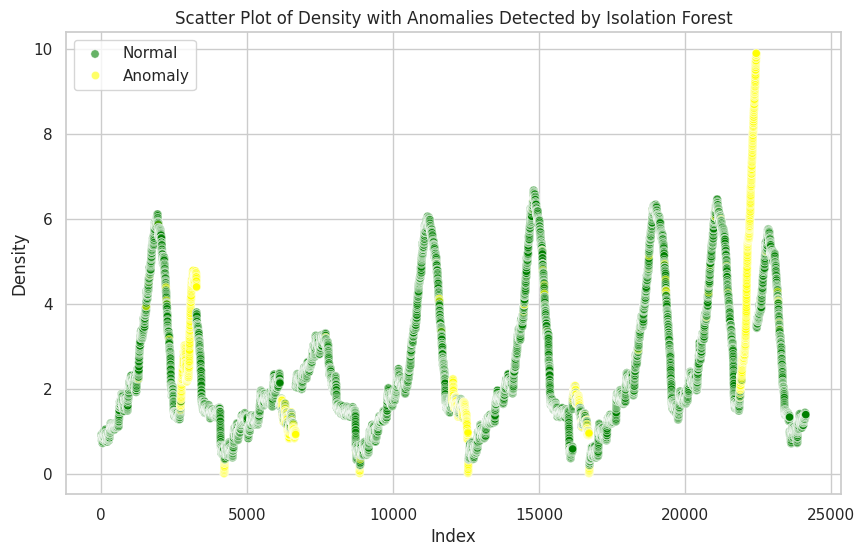

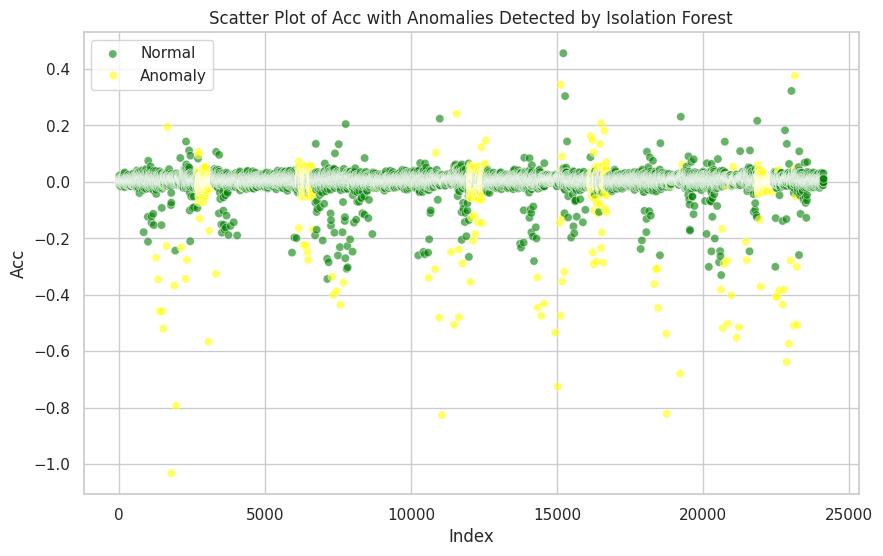

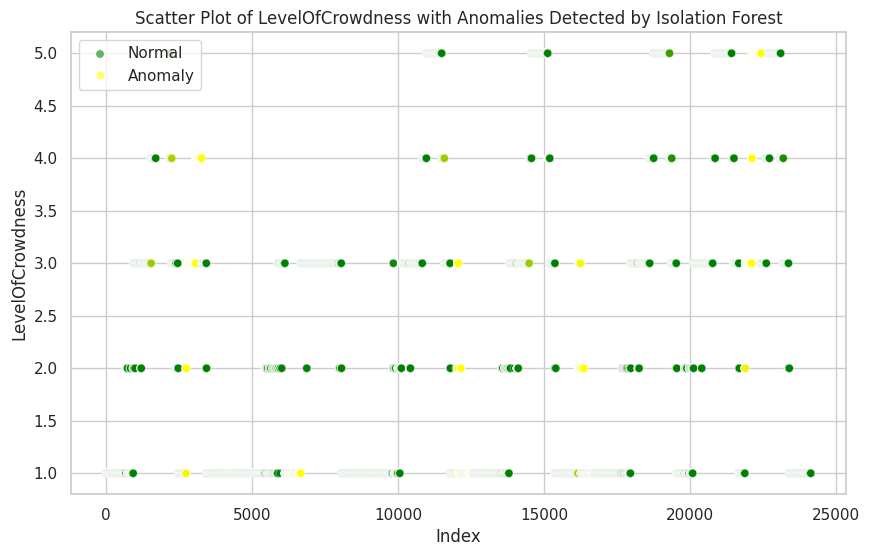

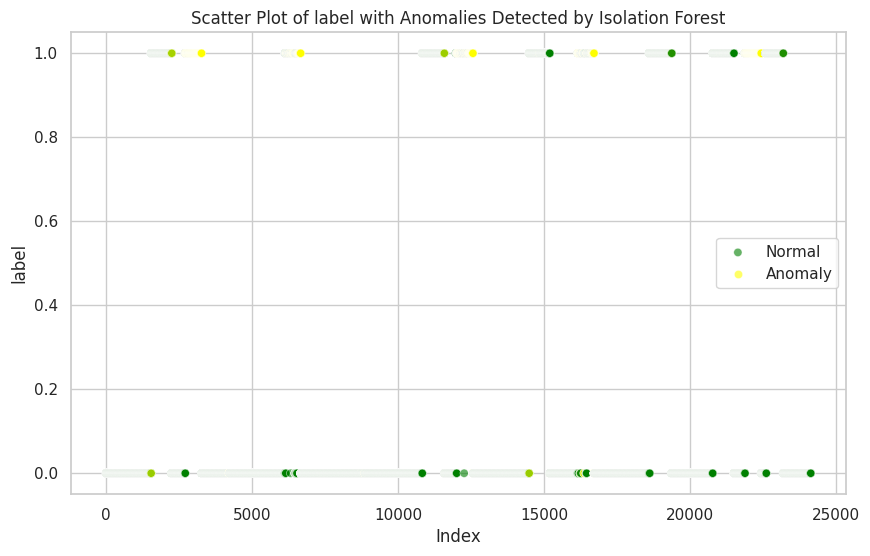

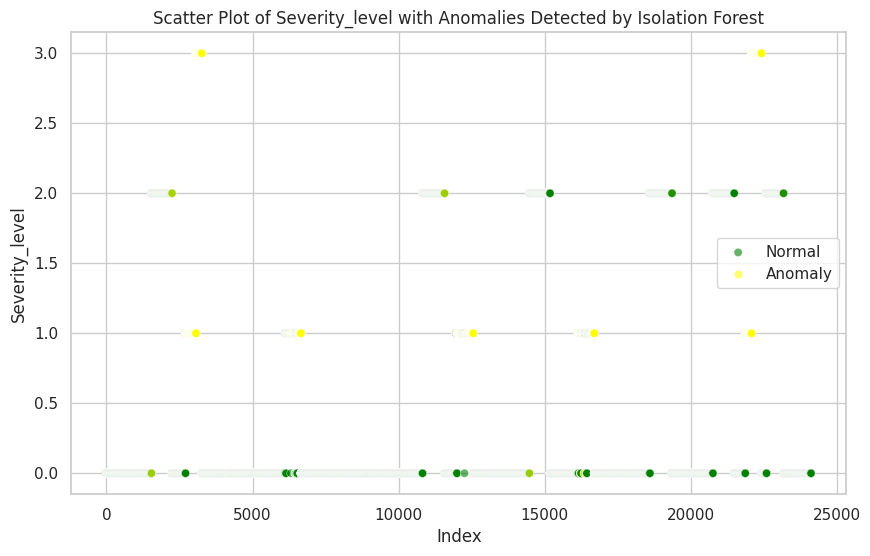

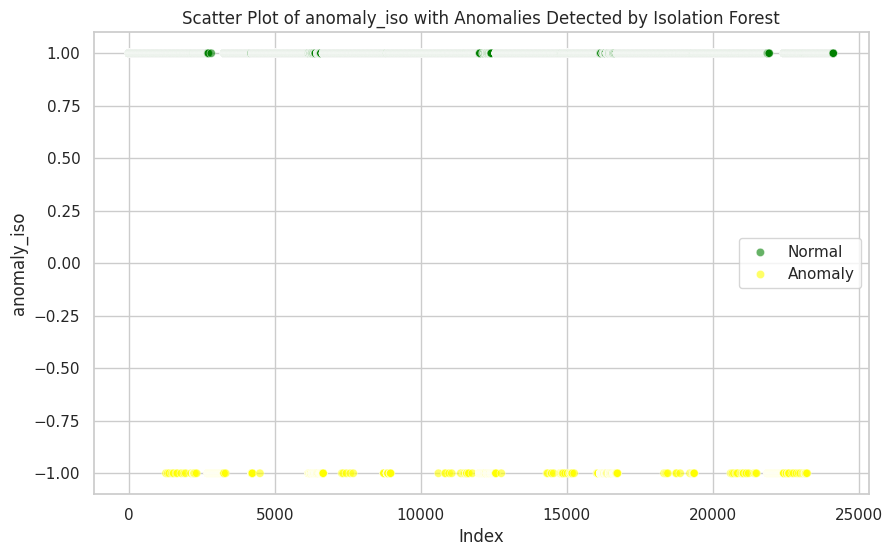

In [59]:
# scatter plots
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data.index, y=data[col], hue=data['anomaly_iso'], palette={1: 'green', -1: 'yellow'}, alpha=0.8) # Use 'data' instead of 'df'
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Scatter Plot of {col} with Anomalies Detected by Isolation Forest')
    plt.legend(labels=['Normal', 'Anomaly'])
    plt.show()

## Local Outlier Factor

Accuracy of LOF: 96.99%
Total number of outliers detected by LOF: 724


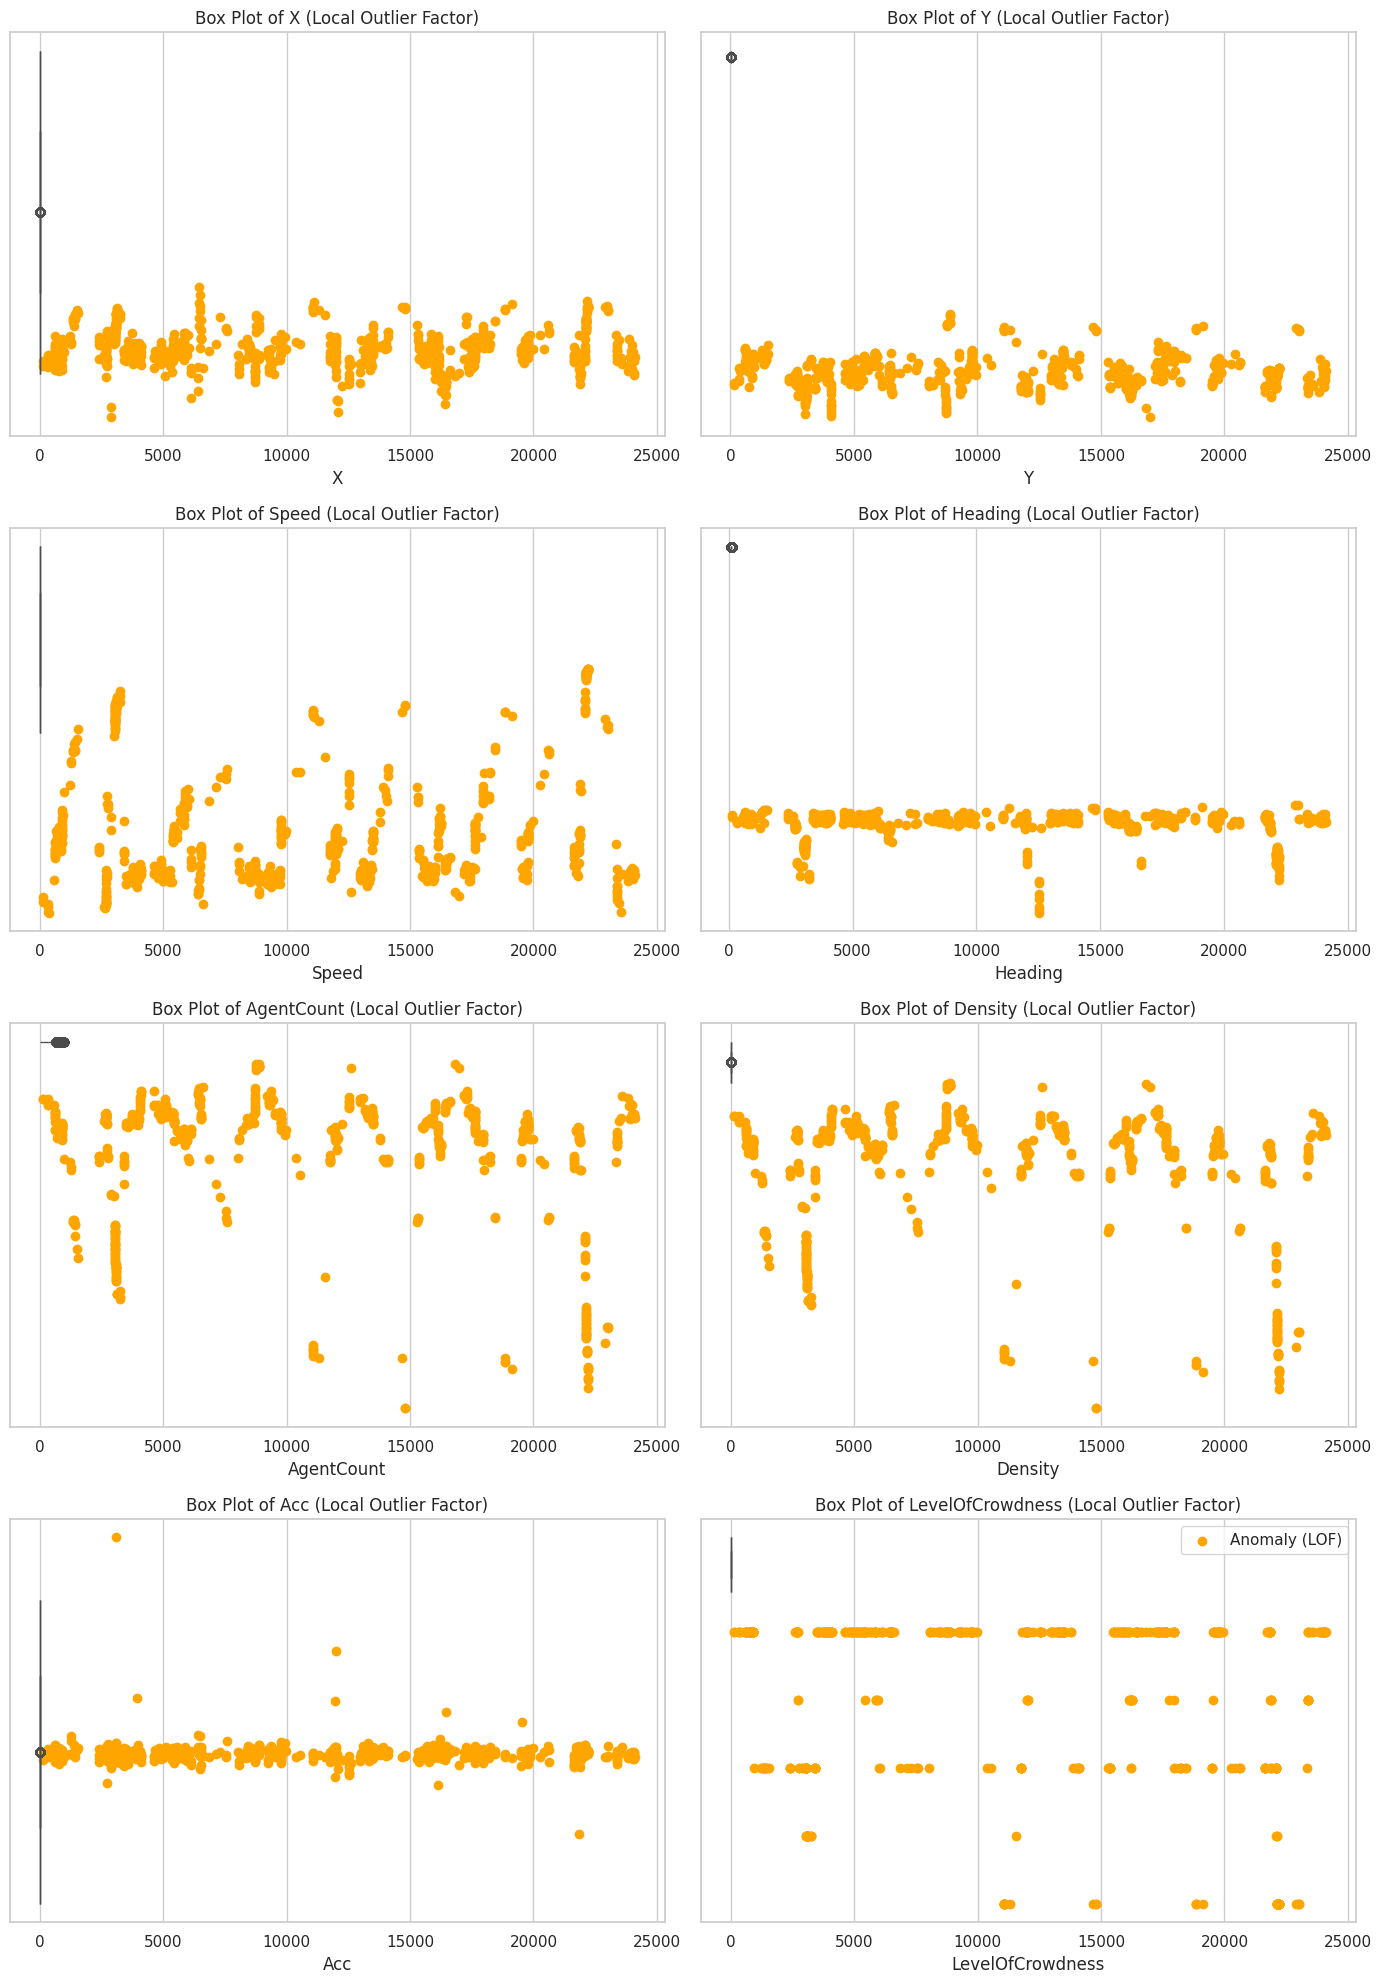

In [63]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load your data here. Replace 'your_data.csv' with the actual file path
data = pd.read_csv('/content/drive/MyDrive/Crowd data for anomaly detection.csv')

# Define columns for analysis
columns = ['X', 'Y', 'Speed', 'Heading', 'AgentCount', 'Density', 'Acc', 'LevelOfCrowdness']

# Impute missing values using the mean strategy
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data[columns])

# Split the data into training and testing sets (80:20 ratio)
train_data, test_data = train_test_split(data_imputed, test_size=0.2, random_state=42)

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.03)  # Adjust n_neighbors as needed
lof.fit(train_data)

# Predict anomalies on the testing data
test_predictions = lof.fit_predict(test_data)

# Convert predictions to binary (1 for normal, -1 for anomaly)
test_anomalies = np.where(test_predictions == 1, 0, 1)

# For calculating accuracy, we need ground truth labels.
# Replace 'test_labels' with your actual test labels if available.
# For demonstration, let's assume all test data points are normal (label 0).
test_labels = np.zeros(test_data.shape[0])

# Calculate accuracy
accuracy = accuracy_score(test_labels, test_anomalies) * 100
print(f'Accuracy of LOF: {accuracy:.2f}%')

# Add anomaly labels to the original data
data['anomaly_lof'] = lof.fit_predict(data_imputed)

# Extract the anomalies
outliers_lof = data[data['anomaly_lof'] == -1]

# Print total number of outliers
print(f'Total number of outliers detected by LOF: {outliers_lof.shape[0]}')

# Plotting for Local Outlier Factor
num_columns = len(columns)
num_rows = (num_columns + 1) // 2
plt.figure(figsize=(14, 5 * num_rows))
for i, feature in enumerate(columns, 1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x=data[feature])
    plt.scatter(outliers_lof.index, outliers_lof[feature], color='orange', label='Anomaly (LOF)')
    plt.title(f'Box Plot of {feature} (Local Outlier Factor)')
plt.legend()
plt.tight_layout()
plt.show()

K-Nearest Neighbors Model
Accuracy: 0.9964766839378238
Precision: 0.9938144329896907
Recall: 0.9944979367262724
F1 Score: 0.9941560673771055
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3371
           1       0.99      0.99      0.99      1454

    accuracy                           1.00      4825
   macro avg       1.00      1.00      1.00      4825
weighted avg       1.00      1.00      1.00      4825

[[3362    9]
 [   8 1446]]


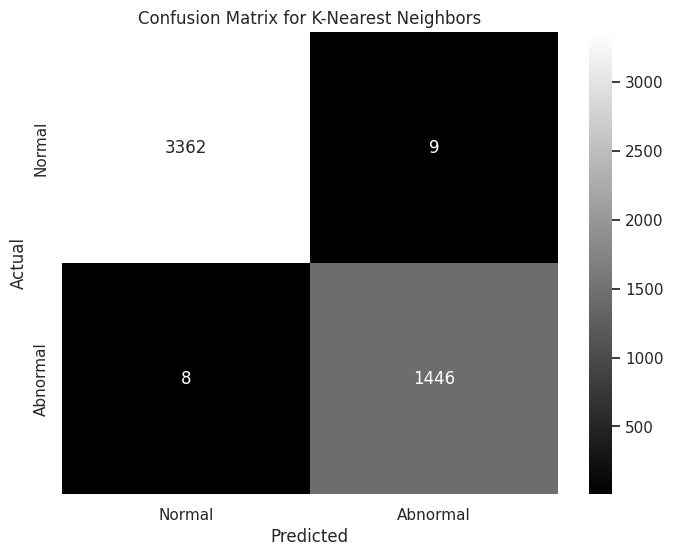

In [66]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X = standardized_data[['Heading', 'Density','Acc']]
y = df['label']

# Bin the target variable if it is continuous
if y.dtype == 'float' or y.dtype == 'int':
    y_binned = pd.cut(y, bins=2, labels=[0, 1])  # Bin into two categories: normal (0) and anomaly (1)
else:
    y_binned = y

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("K-Nearest Neighbors Model")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)

# Plotting the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="gray", xticklabels=["Normal", "Abnormal"], yticklabels=["Normal", "Abnormal"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot the confusion matrix for KNN
plot_confusion_matrix(cm_knn, "K-Nearest Neighbors")

Isolation Forest

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Accuracy: 0.8804145077720207
Precision: 0.7838187702265372
Recall: 0.8328748280605227
F1-Score: 0.8076025341780593
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3371
           1       0.78      0.83      0.81      1454

    accuracy                           0.88      4825
   macro avg       0.85      0.87      0.86      4825
weighted avg       0.88      0.88      0.88      4825

[[3037  334]
 [ 243 1211]]


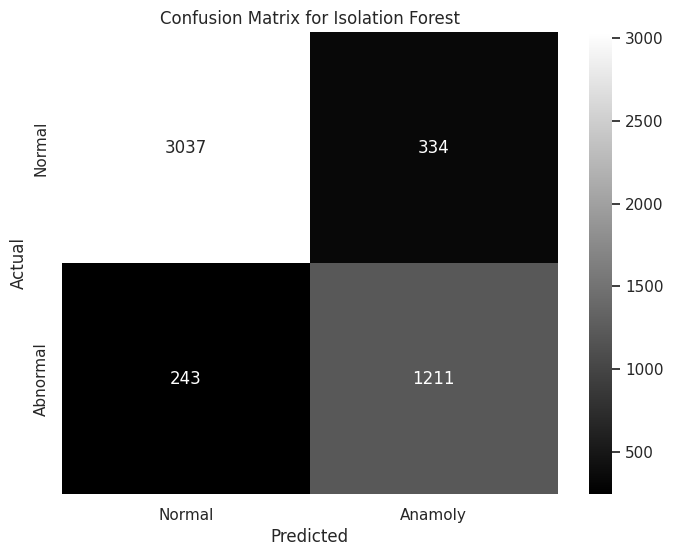

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
#train
iso_forest = IsolationForest(contamination=0.3, random_state=42)
iso_forest.fit(X_train)

y_pred_train = iso_forest.predict(X_train)
y_pred_test = iso_forest.predict(X_test)
y_pred_train = np.where(y_pred_train == -1, 1, 0)
y_pred_test = np.where(y_pred_test == -1, 1, 0)

accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("Accuracy:", accuracy)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
anomaly_scores = iso_forest.decision_function(X_test)

print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
print(cm)
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="gray", xticklabels=["Normal", "Anamoly"], yticklabels=["Normal", "Abnormal"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
plot_confusion_matrix(cm, "Isolation Forest")


## Random Forest Classifier

Accuracy: 0.9995854922279793
Precision: 1.0
Recall: 0.9986244841815681
F1-Score: 0.9993117687543015
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3371
           1       1.00      1.00      1.00      1454

    accuracy                           1.00      4825
   macro avg       1.00      1.00      1.00      4825
weighted avg       1.00      1.00      1.00      4825

[[3371    0]
 [   2 1452]]


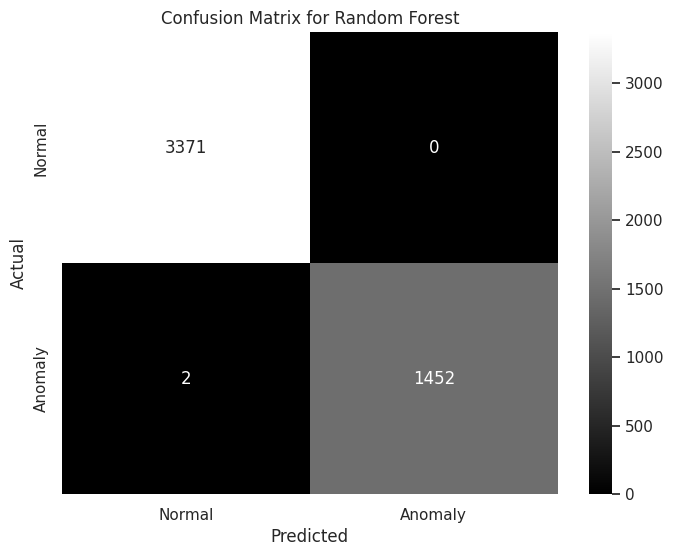

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Assuming X_train, X_test, y_train, and y_test are already defined

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("Accuracy:", accuracy)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
print(cm)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="gray", xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(cm, "Random Forest")


Epoch 1/20
483/483 [==============================] - 3s 3ms/step - loss: 0.7482 - val_loss: 0.7262
Epoch 2/20
483/483 [==============================] - 2s 3ms/step - loss: 0.6364 - val_loss: 0.7176
Epoch 3/20
483/483 [==============================] - 2s 4ms/step - loss: 0.6328 - val_loss: 0.7167
Epoch 4/20
483/483 [==============================] - 2s 4ms/step - loss: 0.6321 - val_loss: 0.7160
Epoch 5/20
483/483 [==============================] - 2s 5ms/step - loss: 0.6317 - val_loss: 0.7156
Epoch 6/20
483/483 [==============================] - 1s 3ms/step - loss: 0.6313 - val_loss: 0.7154
Epoch 7/20
483/483 [==============================] - 1s 3ms/step - loss: 0.6311 - val_loss: 0.7157
Epoch 8/20
483/483 [==============================] - 1s 3ms/step - loss: 0.6309 - val_loss: 0.7151
Epoch 9/20
483/483 [==============================] - 1s 3ms/step - loss: 0.6308 - val_loss: 0.7151
Epoch 10/20
483/483 [==============================] - 2s 4ms/step - loss: 0.6307 - val_loss: 0.7151

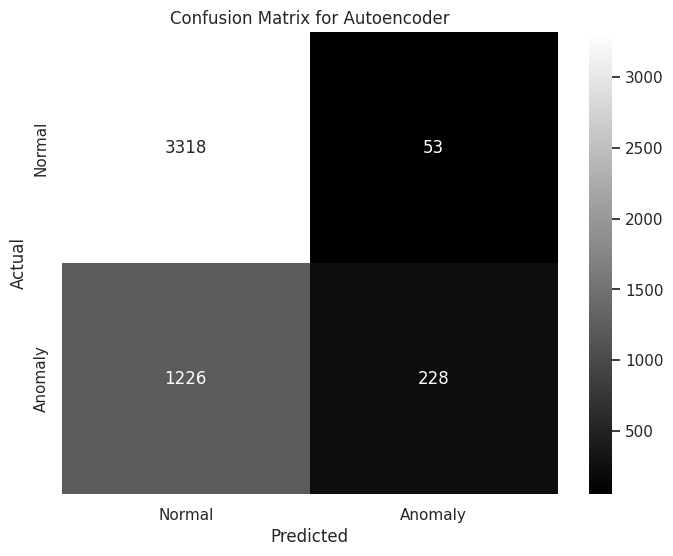

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

# Assuming X_train, X_test, y_train, y_test are already defined

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='relu')(encoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=20, batch_size=32, shuffle=True, validation_split=0.2, verbose=1)

# Predict reconstruction error on the test set
X_train_pred = autoencoder.predict(X_train)
X_test_pred = autoencoder.predict(X_test)

# Calculate reconstruction error
mse_train = np.mean(np.power(X_train - X_train_pred, 2), axis=1)
mse_test = np.mean(np.power(X_test - X_test_pred, 2), axis=1)

# Define threshold for anomaly detection
threshold = np.percentile(mse_train, 95)

# Predict anomalies
y_pred_train = (mse_train > threshold).astype(int)
y_pred_test = (mse_test > threshold).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("Accuracy:", accuracy)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')

print(classification_report(y_test, y_pred_test))

cm = confusion_matrix(y_test, y_pred_test)
print(cm)

# Function to plot the confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="gray", xticklabels=["Normal", "Anomaly"], yticklabels=["Normal", "Anomaly"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(cm, "Autoencoder")
